In [1]:
from planetary_computer import sign
from pystac_client    import Client
import rasterio
from rasterio.merge   import merge

# 1) open the STAC catalog and search
catalog = Client.open("https://planetarycomputer.microsoft.com/api/stac/v1")
search  = catalog.search(
    collections=["mola-dem"],
    bbox=[-115, 0, -90, 30]          # Tharsis lon/lat box
)
items = list(search.get_items())

# 2) assemble and write out a single GeoTIFF
srcs = [rasterio.open(sign(item.assets["data"].href)) for item in items]
mosaic, out_trans = merge(srcs)
meta = srcs[0].meta.copy()
meta.update({
    "height": mosaic.shape[1],
    "width":  mosaic.shape[2],
    "transform": out_trans
})
with rasterio.open("tharsis_mola.tif", "w", **meta) as dst:
    dst.write(mosaic)
print("Wrote Tharsis DEM → tharsis_mola.tif")


ModuleNotFoundError: No module named 'planetary_computer'

In [3]:
!pip install planetary-computer pystac-client rasterio geopandas fsspec requests shapely pandas numpy


   ---------------------------------------- 0.0/25.4 MB ? eta -:--:--
   ---- ----------------------------------- 3.1/25.4 MB 18.4 MB/s eta 0:00:02
   ----------- ---------------------------- 7.1/25.4 MB 16.7 MB/s eta 0:00:02
   -------------- ------------------------- 9.4/25.4 MB 16.8 MB/s eta 0:00:01
   ------------------ --------------------- 11.5/25.4 MB 14.4 MB/s eta 0:00:01
   --------------------- ------------------ 13.6/25.4 MB 12.8 MB/s eta 0:00:01
   ------------------------- -------------- 16.0/25.4 MB 12.6 MB/s eta 0:00:01
   ---------------------------- ----------- 18.4/25.4 MB 12.4 MB/s eta 0:00:01
   -------------------------------- ------- 21.0/25.4 MB 13.0 MB/s eta 0:00:01
   ------------------------------------ --- 23.1/25.4 MB 12.4 MB/s eta 0:00:01
   ---------------------------------------  25.4/25.4 MB 12.8 MB/s eta 0:00:01
   ---------------------------------------- 25.4/25.4 MB 11.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:-

In [1]:
from planetary_computer import sign
from pystac_client    import Client
import rasterio

print("planetary_computer version:", sign)   # just to confirm it imported
print("pystac_client version:", Client)
print("rasterio version:", rasterio.__version__)


planetary_computer version: <function sign at 0x000001F229A09300>
pystac_client version: <class 'pystac_client.client.Client'>
rasterio version: 1.4.3


In [3]:
from planetary_computer import sign
from pystac_client    import Client
import rasterio
from rasterio.merge   import merge

# Define your lon/lat bounding box for Tharsis:
#     [west_lon, south_lat, east_lon, north_lat]
bbox = [-115, 0, -90, 30]

# 1) open the STAC catalog and search for MOLA DEM tiles in that box
catalog = Client.open("https://planetarycomputer.microsoft.com/api/stac/v1")
search  = catalog.search(
    collections=["mola-dem"],
    bbox=bbox
)
items = list(search.get_items())
print(f"Found {len(items)} DEM tiles")

# 2) sign and open each tile, then merge
srcs = [rasterio.open(sign(item.assets["data"].href)) for item in items]
mosaic, out_trans = merge(srcs)

# 3) prepare metadata and write out a single GeoTIFF
meta = srcs[0].meta.copy()
meta.update({
    "height": mosaic.shape[1],
    "width":  mosaic.shape[2],
    "transform": out_trans
})
out_path = "tharsis_mola.tif"
with rasterio.open(out_path, "w", **meta) as dst:
    dst.write(mosaic)

print("Wrote Tharsis DEM →", out_path)


C:\Users\Dell\anaconda3\Lib\site-packages\pystac_client\item_search.py:881: FutureWarning: get_items() is deprecated, use items() instead
  warnings.warn(


Found 0 DEM tiles


IndexError: list index out of range

In [5]:
from pystac_client import Client

catalog = Client.open("https://planetarycomputer.microsoft.com/api/stac/v1")

# get_collections() returns a generator of Collection objects
ids = [c.id for c in catalog.get_collections()]
print("\n".join(ids))


daymet-annual-pr
daymet-daily-hi
3dep-seamless
3dep-lidar-dsm
fia
sentinel-1-rtc
gridmet
daymet-annual-na
daymet-monthly-na
daymet-annual-hi
daymet-monthly-hi
daymet-monthly-pr
gnatsgo-tables
hgb
cop-dem-glo-30
cop-dem-glo-90
terraclimate
nasa-nex-gddp-cmip6
gpm-imerg-hhr
gnatsgo-rasters
3dep-lidar-hag
io-lulc-annual-v02
goes-cmi
conus404
3dep-lidar-intensity
3dep-lidar-pointsourceid
mtbs
noaa-c-cap
3dep-lidar-copc
modis-64A1-061
alos-fnf-mosaic
3dep-lidar-returns
mobi
landsat-c2-l2
era5-pds
chloris-biomass
kaza-hydroforecast
planet-nicfi-analytic
modis-17A2H-061
modis-11A2-061
daymet-daily-pr
3dep-lidar-dtm-native
3dep-lidar-classification
3dep-lidar-dtm
gap
modis-17A2HGF-061
planet-nicfi-visual
gbif
modis-17A3HGF-061
modis-09A1-061
alos-dem
alos-palsar-mosaic
deltares-water-availability
modis-16A3GF-061
modis-21A2-061
us-census
jrc-gsw
deltares-floods
modis-43A4-061
modis-09Q1-061
modis-14A1-061
hrea
modis-13Q1-061
modis-14A2-061
sentinel-2-l2a
modis-15A2H-061
modis-11A1-061
modis-15

In [7]:
# [west_lon, south_lat, east_lon, north_lat]
bbox = [240, -30, 270, 30]


In [9]:
from planetary_computer import sign
from pystac_client    import Client
import rasterio
from rasterio.merge   import merge

# ---- edit these two lines based on step (1) ----
COLLECTION_ID = "mola-dem"      # or whatever exact id you found
bbox          = [240, -30, 270, 30]

catalog = Client.open("https://planetarycomputer.microsoft.com/api/stac/v1")
search  = catalog.search(
    collections=[COLLECTION_ID],
    bbox=bbox
)

items = list(search.items())     # new API; formerly get_items()
print(f"Found {len(items)} DEM tiles")

if len(items)==0:
    raise RuntimeError("No tiles found—double check your COLLECTION_ID and bbox.")

# now sign & open them
srcs = [rasterio.open(sign(it.assets["data"].href)) for it in items]

# merge into one array
mosaic, out_trans = merge(srcs)

# write out a GeoTIFF
meta = srcs[0].meta.copy()
meta.update({
    "height":    mosaic.shape[1],
    "width":     mosaic.shape[2],
    "transform": out_trans
})
out_path = "tharsis_mola.tif"
with rasterio.open(out_path, "w", **meta) as dst:
    dst.write(mosaic)

print("✔️ Wrote Tharsis DEM →", out_path)


APIError: [{'type': 'value_error', 'loc': ('body', 'bbox'), 'msg': 'Value error, Bounding box must be within (-180, -90, 180, 90)', 'input': [240.0, -30.0, 270.0, 30.0], 'ctx': {'error': ValueError('Bounding box must be within (-180, -90, 180, 90)')}}]

In [11]:
from pystac_client import Client

# NASA PDS STAC root (includes MOLA)
NASA_PDS_STAC = "https://raw.githubusercontent.com/NASA-STAC/NASA-PDS-STAC/main/catalog.json"
catalog = Client.open(NASA_PDS_STAC)


APIError: 404: Not Found

In [13]:
# 1) (Re)install dependencies
!pip install --quiet pystac-client rasterio

# 2) Imports
from pystac_client import Client
import rasterio
from rasterio.merge import merge
import numpy as np

# 3) Open the USGS Mars STAC API
USGS_STAC = "https://stac.astrogeology.usgs.gov/api/stac/v1"
catalog   = Client.open(USGS_STAC)

# 4) Define your area of interest (Tharsis region)
#    Mars longitudes 230°–255°E → convert to -130°… -105° (lon-360)
#    Latitudes roughly 0°–30°N
lon_min, lon_max = -130, -105
lat_min, lat_max = 0,    30
bbox = [lon_min, lat_min, lon_max, lat_max]

# 5) Pick the CTX DTM collection (list all to confirm)
print("Available collections:")
for c in catalog.get_collections():
    if "ctxdtm" in c.id:
        print(" •", c.id)
# ← e.g. mars-ctxdtm-20m

COLLECTION_ID = "mars-ctxdtm-20m"  # use the exact ID you see above

# 6) Search for tiles in your bbox
search = catalog.search(collections=[COLLECTION_ID], bbox=bbox)
items  = list(search.items())
print(f"Found {len(items)} tiles in {COLLECTION_ID}")

# 7) Open each tile and merge into one big array
srcs   = [rasterio.open(item.assets["data"].href) for item in items]
mosaic, out_trans = merge(srcs)

# 8) Quick sanity check
print("Mosaic shape:", mosaic.shape)
print("Transform:", out_trans)

# Now you can write out 'mosaic' to disk or window-slice it into 1 km² tiles.


APIError: {"code":"NotFound","description":"Not Found"}

In [15]:
# from a notebook cell
!pip install --upgrade pystac_client planetary-computer rasterio


In [17]:
from pystac_client import Client
from planetary_computer import sign
import rasterio
from rasterio.merge import merge


In [19]:
catalog = Client.open("https://planetarycomputer.microsoft.com/api/stac/v1")


In [21]:
[c.id for c in catalog.get_collections() if c.id.startswith("pds:")]


[]

In [23]:
catalog = Client.open("https://planetarycomputer.microsoft.com/api/stac/v1")

In [25]:
[c.id for c in catalog.get_collections() if c.id.startswith("pds:")]


[]

In [27]:
# 1) install / upgrade
!pip install --upgrade pystac_client planetary-computer rasterio

# 2) imports
from pystac_client import Client
from planetary_computer import sign
import rasterio
from rasterio.merge import merge

# 3) open the Planetary Computer STAC API
catalog = Client.open("https://planetarycomputer.microsoft.com/api/stac/v1")

# 4) pick the MOLA topography collection
collection_id = "pds:mola-megdr"

# 5) define your Tharsis bounding box
#    Mars 230–255°E → subtract 360 → -130…-105
#    Latitudes 0–30°N
bbox = [-130, 0, -105, 30]

# 6) search
search = catalog.search(
    collections=[collection_id],
    bbox=bbox
)

# 7) pull *all* items out of the search
items = list(search.get_all_items())   # <-- get_all_items(), not get_items()
print(f"Found {len(items)} DEM tiles")

# sanity print first href
if items:
    print("Example tile:", items[0].assets["data"].href)

# 8) if you want to merge them immediately:
srcs = [rasterio.open(sign(it.assets["data"].href)) for it in items]
mosaic, out_trans = merge(srcs)
print("Merged DEM shape:", mosaic.shape)


Found 0 DEM tiles


C:\Users\Dell\anaconda3\Lib\site-packages\pystac_client\item_search.py:896: FutureWarning: get_all_items() is deprecated, use item_collection() instead.
  warnings.warn(


IndexError: list index out of range

In [29]:
from pystac_client import Client

# NB: use the *master* branch URL
PDS_STAC = "https://raw.githubusercontent.com/NASA-STAC/NASA-PDS-STAC/master/catalog.json"
catalog = Client.open(PDS_STAC)

# look for the MOLA MEGDR collection
mola_collections = [c.id for c in catalog.get_all_collections() if "mola" in c.id.lower()]
print("MOLA collections:\n", "\n".join(mola_collections))


APIError: 404: Not Found

In [31]:
# 1) Install & import
#    !pip install pystac-client planetary-computer rasterio
from pystac_client import Client
from planetary_computer import sign
import rasterio
from rasterio.merge import merge

# 2) Open the USGS ARD STAC catalog (no '/stac/v1' suffix!):
usgs_catalog = Client.open("https://stac.astrogeology.usgs.gov/api")
print("USGS Collections:", [c.id for c in usgs_catalog.get_collections()])

# 3) If you want the NASA PDS STAC (for MOLA) instead:
PDS_STAC = "https://raw.githubusercontent.com/NASA-STAC/NASA-PDS-STAC/main/catalog.json"
pds_catalog = Client.open(PDS_STAC)
print("PDS Collections:", [c.id for c in pds_catalog.get_all_collections()])

# 4) Define your bbox in Earth‐style lon/lat (Martian east‐long >180 must be wrapped into [-180,180]):
#    Tharsis east‐longitudes 230°–255°E translate to [-130, -105] in our box
lon_min, lat_min, lon_max, lat_max = -130, 0, -105, 30
bbox = [lon_min, lat_min, lon_max, lat_max]

# 5) Search for the MOLA MEGDR collection in the PDS catalog:
search = pds_catalog.search(
    collections=["pds-mola-megdr-5"],  # use the exact ID printed above
    bbox=bbox,
    max_items=100
)
items = list(search.item_collection())
print(f"Found {len(items)} MOLA DEM tiles")

# 6) If you get zero tiles:
#    • double‐check that your bbox is within ±180°
#    • confirm that the collection ID matches one of those printed above

# 7) (Optional) merge the first few DEM tiles into one mosaic:
if items:
    srcs = [rasterio.open(sign(item.assets["data"].href)) for item in items]
    mosaic, out_trans = merge(srcs)
    print("Merged DEM shape:", mosaic.shape)


USGS Collections: ['galileo_usgs_photogrammetrically_controlled_observations', 'mro_hirise_socet_dtms', 'lunar_orbiter_laser_altimeter', 'kaguya_terrain_camera_monoscopic_uncontrolled_observations', 'kaguya_terrain_camera_stereoscopic_uncontrolled_observations', 'galileo_usgs_photogrammetrically_controlled_mosaics', 'mo_themis_controlled_mosaics', 'mro_ctx_controlled_usgs_dtms', 'galileo_usgs_photogrammetrically_controlled_dtms', 'mro_hirise_uncontrolled_observations', 'mro_hirise_socet_dtms_test', 'kaguya_terrain_camera_spsupport_uncontrolled_observations', 'kaguya_terrain_camera_usgs_dtms']


APIError: 404: Not Found

In [33]:
# 1) core imports
from pystac_client import Client
from planetary_computer import sign
import rasterio
from rasterio.merge import merge
import numpy as np

# 2) open the USGS Astrogeology STAC API (for CTX, HiRISE, etc.)
USGS_STAC = "https://stac.astrogeology.usgs.gov/api/stac/v1"
usgs = Client.open(USGS_STAC)

# 3) open the NASA-PDS STAC catalog (for MOLA MEGDR)
#    NOTE: this is the canonical GitHub JSON for the PDS-STAC catalog
PDS_STAC = "https://raw.githubusercontent.com/NASA-PDS/NASA-PDS-STAC/master/catalog.json"
pds  = Client.open(PDS_STAC)

# 4) pick the collections you care about
CTX_COLLECTION   = "mro_ctx_controlled_usgs_dtms"
MOLA_COLLECTION  = "mola_megdr_global_1184"    # MOLA MEGDR global DEM

# 5) define your Mars bbox in “Earth” lon/lat after wrapping east-long > 180°:
#    e.g. Tharsis 230°–255°E → (230–360)=–130° … (255–360)=–105°
#    pick your Y range likewise (e.g. 0°–30°N)
lon_min, lat_min, lon_max, lat_max = -130, 0, -105, 30
bbox = [lon_min, lat_min, lon_max, lat_max]

# 6) search both datasets
ctx_search  = usgs.search(collections=[CTX_COLLECTION], bbox=bbox)
mola_search = pds.search (collections=[MOLA_COLLECTION], bbox=bbox)

ctx_items  = list(ctx_search.get_items())    # CTX DEM tiles
mola_items = list(mola_search.get_items())  # MOLA MEGDR tiles

print(f"Found {len(ctx_items)} CTX tiles and {len(mola_items)} MOLA tiles")

# 7) if you want to merge them immediately into two mosaics:
def make_mosaic(items):
    srcs = [rasterio.open(sign(it.assets["data"].href)) for it in items]
    m, t = merge(srcs)
    return m, t

if ctx_items:
    ctx_mosaic, ctx_transform = make_mosaic(ctx_items)
    print("CTX mosaic is", ctx_mosaic.shape)

if mola_items:
    mola_mosaic, mola_transform = make_mosaic(mola_items)
    print("MOLA mosaic is", mola_mosaic.shape)

# 8) write out a GeoTIFF if you like
out_meta = srcs[0].meta.copy()
out_meta.update({
    "driver": "GTiff",
    "height": ctx_mosaic.shape[1],
    "width":  ctx_mosaic.shape[2],
    "transform": ctx_transform,
})
with rasterio.open("tharsis_ctx_dem.tif", "w", **out_meta) as dst:
    dst.write(ctx_mosaic)



APIError: {"code":"NotFound","description":"Not Found"}

In [35]:
https://stac.astrogeology.usgs.gov/api/


SyntaxError: invalid syntax (1527059778.py, line 1)

In [37]:
from pystac_client import Client

# 1) Open the USGS Astrogeology ARD STAC API
usgs = Client.open("https://stac.astrogeology.usgs.gov/api/")

# 2) List available collections
print("USGS Collections:", [c.id for c in usgs.get_collections()])


USGS Collections: ['galileo_usgs_photogrammetrically_controlled_observations', 'mro_hirise_socet_dtms', 'lunar_orbiter_laser_altimeter', 'kaguya_terrain_camera_monoscopic_uncontrolled_observations', 'kaguya_terrain_camera_stereoscopic_uncontrolled_observations', 'galileo_usgs_photogrammetrically_controlled_mosaics', 'mo_themis_controlled_mosaics', 'mro_ctx_controlled_usgs_dtms', 'galileo_usgs_photogrammetrically_controlled_dtms', 'mro_hirise_uncontrolled_observations', 'mro_hirise_socet_dtms_test', 'kaguya_terrain_camera_spsupport_uncontrolled_observations', 'kaguya_terrain_camera_usgs_dtms']


In [39]:
# 3) Open the NASA PDS STAC catalog for MOLA
pds = Client.open(
    "https://raw.githubusercontent.com/NASA-STAC/NASA-PDS-STAC/main/catalog.json"
)

# 4) List available collections (e.g. 'mola_megdr')
print("PDS Collections:", [c.id for c in pds.get_collections()])


APIError: 404: Not Found

In [41]:
# 1) install any missing libs:
#    !pip install pystac-client planetary-computer rasterio

from pystac_client import Client
from planetary_computer import sign
import rasterio
from rasterio.merge import merge

# ─── 2) Connect to USGS Astrogeology STAC API ──────────────────────────────────
usgs = Client.open("https://stac.astrogeology.usgs.gov/api/")

print("USGS Mars Collections:")
for col in usgs.get_collections():
    print("  •", col.id)

# example collections you’ll find there:
#    mro_ctx_controlled_usgs_dtms    ← CTX DEMs
#    mro_hirise_socet_dtms           ← HiRISE DEMs
#    mo_themis_controlled_mosaics    ← THEMIS visible mosaics
# …and more.

# ─── 3) Fetch the NASA-PDS STAC catalog locally ───────────────────────────────
# The PDS STAC repo doesn’t serve a live API, so pull down the static JSON:
!curl -sL \
  https://raw.githubusercontent.com/NASA-PDS/NASA-PDS-STAC/main/catalog.json \
  -o nasa_pds_stac.json

pds = Client.open("nasa_pds_stac.json")
print("\nNASA-PDS Collections:")
for col in pds.get_collections():
    print("  •", col.id)

# look for “mola_megdr” in that list (the global MOLA DEM).

# ─── 4) Example: search & mosaic CTX DEMs over a bbox ─────────────────────────
# define your Mars bbox in lon/lat (east‐longitudes >180 wrapped into [-180,180]):
lon_min, lat_min, lon_max, lat_max = -130, 0, -105, 30    # ~Tharsis

search = usgs.search(
    collections=["mro_ctx_controlled_usgs_dtms"],
    bbox=[lon_min, lat_min, lon_max, lat_max],
    limit=50
)
items = list(search.get_items())
print(f"\nFound {len(items)} CTX DEM tiles in that region")

# download & merge them
srcs = [rasterio.open(sign(item.assets["data"].href)) for item in items]
mosaic, out_trans = merge(srcs)
print("Merged raster shape:", mosaic.shape)

# now you can write out the mosaic:
out_meta = srcs[0].meta.copy()
out_meta.update({
    "height": mosaic.shape[1],
    "width":  mosaic.shape[2],
    "transform": out_trans
})
with rasterio.open("ctx_tharsis_mosaic.tif", "w", **out_meta) as dst:
    dst.write(mosaic)


USGS Mars Collections:
  • galileo_usgs_photogrammetrically_controlled_observations
  • mro_hirise_socet_dtms
  • lunar_orbiter_laser_altimeter
  • kaguya_terrain_camera_monoscopic_uncontrolled_observations
  • kaguya_terrain_camera_stereoscopic_uncontrolled_observations
  • galileo_usgs_photogrammetrically_controlled_mosaics
  • mo_themis_controlled_mosaics
  • mro_ctx_controlled_usgs_dtms
  • galileo_usgs_photogrammetrically_controlled_dtms
  • mro_hirise_uncontrolled_observations
  • mro_hirise_socet_dtms_test
  • kaguya_terrain_camera_spsupport_uncontrolled_observations
  • kaguya_terrain_camera_usgs_dtms


JSONDecodeError: Extra data: line 1 column 4 (char 3)

In [43]:
# 1) pip install if you haven’t already
#    pip install pystac_client pystac planetary-computer rasterio

from pystac_client import Client
from pystac import Catalog
import json

# ─── USGS Astrogeology STAC API ────────────────────────────────────────────────
usgs = Client.open("https://stac.astrogeology.usgs.gov/stac/v1")
print("USGS Collections:", [c.id for c in usgs.get_collections()])

# Example: search CTX DEMs over your bbox (lon/lat in [-180,180], here for Tharsis)
lon_min, lat_min, lon_max, lat_max = -130, 0, -105, 30
ctx_search = usgs.search(
    collections=["mro_ctx_controlled_usgs_dtms"],
    bbox=[lon_min, lat_min, lon_max, lat_max]
)
ctx_items = list(ctx_search.get_all_items())
print(f"Found {len(ctx_items)} CTX DEM tiles")

# ─── NASA-PDS MOLA STAC (static, on GitHub) ────────────────────────────────────
#  a) download once:
#     !curl -sL \
#       https://raw.githubusercontent.com/NASA-STAC/NASA-PDS-STAC/main/catalog.json \
#       -o nasa_pds_stac.json

#  b) open it as a static Catalog
with open("nasa_pds_stac.json","r") as f:
    pds_dict = json.load(f)
pds = Catalog.from_dict(pds_dict)

print("PDS Collections:", [c.id for c in pds.get_collections()])

# Example: drill into the MOLA MEGDR collection and list a few items
mola = pds.get_child("mola_megdr")
print("Some MOLA item IDs:", [item.id for item in mola.get_all_items()][:5])


APIError: <html>
<head><title>404 Not Found</title></head>
<body>
<h1>404 Not Found</h1>
<ul>
<li>Code: NoSuchKey</li>
<li>Message: The specified key does not exist.</li>
<li>Key: stac/v1</li>
<li>RequestId: YAK7XSDV0HHNJMX4</li>
<li>HostId: Rbpd8v+2OvV9j4XmQcdEYjDCmG+EnpgkSo4plysifTd46YEt7z3z1CPW36X+TSClHqfHnT4M7Lw=</li>
</ul>
<h3>An Error Occurred While Attempting to Retrieve a Custom Error Document</h3>
<ul>
<li>Code: NoSuchKey</li>
<li>Message: The specified key does not exist.</li>
<li>Key: index.html</li>
</ul>
<hr/>
</body>
</html>


In [45]:
# 1) install if needed:
#    !pip install pystac_client pystac

from pystac_client import Client
from pystac import Catalog
import json

# ─── USGS Astrogeology STAC API ────────────────────────────────────────────────
usgs = Client.open("https://stac.astrogeology.usgs.gov/stac/v1")
print("USGS Collections:", [c.id for c in usgs.get_collections()])

# ─── NASA-PDS STAC (MOLA) ───────────────────────────────────────────────────────
# Download the static catalog.json (only needs to be done once)
!curl -sL \
  https://raw.githubusercontent.com/NASA-STAC/NASA-PDS-STAC/main/catalog.json \
  -o nasa_pds_stac.json

# Load it as a Catalog
with open("nasa_pds_stac.json","r") as f:
    pds_dict = json.load(f)
pds = Catalog.from_dict(pds_dict)
print("PDS Collections:", [c.id for c in pds.get_collections()])


APIError: <html>
<head><title>404 Not Found</title></head>
<body>
<h1>404 Not Found</h1>
<ul>
<li>Code: NoSuchKey</li>
<li>Message: The specified key does not exist.</li>
<li>Key: stac/v1</li>
<li>RequestId: SHEF3TFT7JVR850X</li>
<li>HostId: 0FLptsNABeslBSwt87HKVGbdzjilGQ/ZjVSsSdd5Ade2GzOdeLpzm2520E8HXsI6TUchqWVCdQ0=</li>
</ul>
<h3>An Error Occurred While Attempting to Retrieve a Custom Error Document</h3>
<ul>
<li>Code: NoSuchKey</li>
<li>Message: The specified key does not exist.</li>
<li>Key: index.html</li>
</ul>
<hr/>
</body>
</html>


In [47]:
# 1) install if needed:
#    !pip install pystac_client pystac

from pystac_client import Client
from pystac import Catalog
import json

# ─── USGS Astrogeology STAC API ────────────────────────────────────────────────
usgs = Client.open("https://stac.astrogeology.usgs.gov/stac/v1")
print("USGS Collections:", [c.id for c in usgs.get_collections()])

# ─── NASA-PDS STAC (MOLA) ───────────────────────────────────────────────────────
# Download the static catalog.json (only needs to be done once)
!curl -sL \
  https://raw.githubusercontent.com/NASA-STAC/NASA-PDS-STAC/main/catalog.json \
  -o nasa_pds_stac.json

# Load it as a Catalog
with open("nasa_pds_stac.json","r") as f:
    pds_dict = json.load(f)
pds = Catalog.from_dict(pds_dict)
print("PDS Collections:", [c.id for c in pds.get_collections()])


APIError: <html>
<head><title>404 Not Found</title></head>
<body>
<h1>404 Not Found</h1>
<ul>
<li>Code: NoSuchKey</li>
<li>Message: The specified key does not exist.</li>
<li>Key: stac/v1</li>
<li>RequestId: ZZJ52BXWHHQBW6F9</li>
<li>HostId: Pf8kLXqGlNEIQml7Wg4ohy8Z3N54KSkrpNl6ZXL9pyH+p9m6id7ii5dJp+lDoTYAa/SFmm9yGd0=</li>
</ul>
<h3>An Error Occurred While Attempting to Retrieve a Custom Error Document</h3>
<ul>
<li>Code: NoSuchKey</li>
<li>Message: The specified key does not exist.</li>
<li>Key: index.html</li>
</ul>
<hr/>
</body>
</html>


In [49]:
from pystac_client import Client

# 1) Open the USGS Astrogeology ARD STAC API
usgs = Client.open("https://stac.astrogeology.usgs.gov/api/")
print("USGS Collections:", [c.id for c in usgs.get_collections()])

# 2) Download the static NASA‐PDS STAC catalog for MOLA
#    (this only needs to be done once)
!curl -sL https://raw.githubusercontent.com/NASA-PDS/NASA-PDS-STAC/main/catalog.json \
      -o nasa_pds_stac.json

# 3) Open the local copy of the NASA‐PDS STAC catalog
pds = Client.open("nasa_pds_stac.json")
print("PDS Collections:", [c.id for c in pds.get_collections()])


USGS Collections: ['galileo_usgs_photogrammetrically_controlled_observations', 'mro_hirise_socet_dtms', 'lunar_orbiter_laser_altimeter', 'kaguya_terrain_camera_monoscopic_uncontrolled_observations', 'kaguya_terrain_camera_stereoscopic_uncontrolled_observations', 'galileo_usgs_photogrammetrically_controlled_mosaics', 'mo_themis_controlled_mosaics', 'mro_ctx_controlled_usgs_dtms', 'galileo_usgs_photogrammetrically_controlled_dtms', 'mro_hirise_uncontrolled_observations', 'mro_hirise_socet_dtms_test', 'kaguya_terrain_camera_spsupport_uncontrolled_observations', 'kaguya_terrain_camera_usgs_dtms']


JSONDecodeError: Extra data: line 1 column 4 (char 3)

In [51]:
# 1) USGS Astrogeology STAC (live API)
from pystac_client import Client
usgs = Client.open("https://stac.astrogeology.usgs.gov/api/")
print("USGS Collections:", [c.id for c in usgs.get_collections()])

# 2) Fetch NASA-PDS STAC catalog JSON to disk (only once)
!curl -sL \
    https://raw.githubusercontent.com/NASA-PDS/NASA-PDS-STAC/main/catalog.json \
    -o nasa_pds_stac.json

# 3) Load that file with pystac.Catalog and list its collections
from pystac import Catalog
pds = Catalog.from_file("nasa_pds_stac.json")
print("PDS Collections:", [col.id for col in pds.get_all_collections()])


USGS Collections: ['galileo_usgs_photogrammetrically_controlled_observations', 'mro_hirise_socet_dtms', 'lunar_orbiter_laser_altimeter', 'kaguya_terrain_camera_monoscopic_uncontrolled_observations', 'kaguya_terrain_camera_stereoscopic_uncontrolled_observations', 'galileo_usgs_photogrammetrically_controlled_mosaics', 'mo_themis_controlled_mosaics', 'mro_ctx_controlled_usgs_dtms', 'galileo_usgs_photogrammetrically_controlled_dtms', 'mro_hirise_uncontrolled_observations', 'mro_hirise_socet_dtms_test', 'kaguya_terrain_camera_spsupport_uncontrolled_observations', 'kaguya_terrain_camera_usgs_dtms']


JSONDecodeError: Extra data: line 1 column 4 (char 3)

In [53]:
# 1) Show the first few lines of the downloaded file
!head -n5 nasa_pds_stac.json

# 2) Show the last few lines
!tail -n5 nasa_pds_stac.json


"head" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"tail" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [55]:
# 1) Peek at the first few lines
with open("nasa_pds_stac.json", "r", encoding="utf-8") as f:
    for i, line in enumerate(f):
        if i < 5:
            print(line.rstrip())
        else:
            break

# 2) Peek at the last few lines
from collections import deque
with open("nasa_pds_stac.json", "r", encoding="utf-8") as f:
    tail = deque(f, maxlen=5)
print("\n".join(line.rstrip() for line in tail))

# 3) Try a raw JSON load (also strip a possible BOM)
import json
with open("nasa_pds_stac.json", "rb") as f:
    raw = f.read()
# remove UTF-8 BOM if present
if raw.startswith(b'\xef\xbb\xbf'):
    raw = raw[3:]
data = json.loads(raw)
print("Top‐level keys:", list(data.keys()))

# 4) If that succeeds, build your STAC catalog:
from pystac import Catalog
pds = Catalog.from_dict(data, href="nasa_pds_stac.json")
print("PDS collections:", [c.id for c in pds.get_all_collections()])


404: Not Found
404: Not Found


JSONDecodeError: Extra data: line 1 column 4 (char 3)

In [57]:
!curl -sL \
  https://raw.githubusercontent.com/NASA-PDS/PDS-Public-STAC/main/catalog.json \
  -o nasa_pds_stac.json


In [59]:
from pystac import Catalog
pds = Catalog.from_file("nasa_pds_stac.json")
print([c.id for c in pds.get_all_collections()])


JSONDecodeError: Extra data: line 1 column 4 (char 3)

In [61]:
# 1) USGS Astrogeology STAC API for Mars (CTX, HiRISE, THEMIS, etc.)
from pystac_client import Client

usgs = Client.open("https://stac.astrogeology.usgs.gov/api") 
print("USGS Mars collections:")
for col in usgs.get_collections():
    print("  •", col.id)

# ────────────────────────────────────────────────────────────────────────────

# 2) NASA-PDS “static” STAC catalog (MOLA MEGDR, etc.)
#    Download the catalog JSON and strip any BOM (on Windows 'head'/'tail' won't work):
import requests, json, codecs

url = "https://raw.githubusercontent.com/NASA-PDS/NASA-PDS-STAC/main/catalog.json"
r = requests.get(url)
r.raise_for_status()

# Write out with UTF-8-SIG handling to remove any leading BOM
with codecs.open("nasa_pds_stac.json", "w", "utf-8") as f:
    # codecs.open with 'utf-8' won’t re-emit BOM if we read it in via r.content.decode('utf-8-sig')
    clean = r.content.decode("utf-8-sig")
    f.write(clean)

# Quick sanity check: does file start with “{”?
with open("nasa_pds_stac.json","r") as f:
    head = f.read(10)
print("\nNASA-PDS catalog head:", repr(head))

# 3) Load it with pystac and list its collections
from pystac import Catalog

pds = Catalog.from_file("nasa_pds_stac.json")
print("\nNASA-PDS collections:")
for col in pds.get_all_collections():
    print("  •", col.id)


USGS Mars collections:
  • galileo_usgs_photogrammetrically_controlled_observations
  • mro_hirise_socet_dtms
  • lunar_orbiter_laser_altimeter
  • kaguya_terrain_camera_monoscopic_uncontrolled_observations
  • kaguya_terrain_camera_stereoscopic_uncontrolled_observations
  • galileo_usgs_photogrammetrically_controlled_mosaics
  • mo_themis_controlled_mosaics
  • mro_ctx_controlled_usgs_dtms
  • galileo_usgs_photogrammetrically_controlled_dtms
  • mro_hirise_uncontrolled_observations
  • mro_hirise_socet_dtms_test
  • kaguya_terrain_camera_spsupport_uncontrolled_observations
  • kaguya_terrain_camera_usgs_dtms


HTTPError: 404 Client Error: Not Found for url: https://raw.githubusercontent.com/NASA-PDS/NASA-PDS-STAC/main/catalog.json

In [63]:
# in a Jupyter cell, or your terminal:
!pip install pystac-client pystac planetary-computer


In [65]:
from pystac_client import Client
from pystac import Catalog
import os


In [67]:
usgs = Client.open("https://stac.astrogeology.usgs.gov/api/")

print("USGS Astrogeology collections:")
for col in usgs.get_collections():
    print("  •", col.id)


USGS Astrogeology collections:
  • galileo_usgs_photogrammetrically_controlled_observations
  • mro_hirise_socet_dtms
  • lunar_orbiter_laser_altimeter
  • kaguya_terrain_camera_monoscopic_uncontrolled_observations
  • kaguya_terrain_camera_stereoscopic_uncontrolled_observations
  • galileo_usgs_photogrammetrically_controlled_mosaics
  • mo_themis_controlled_mosaics
  • mro_ctx_controlled_usgs_dtms
  • galileo_usgs_photogrammetrically_controlled_dtms
  • mro_hirise_uncontrolled_observations
  • mro_hirise_socet_dtms_test
  • kaguya_terrain_camera_spsupport_uncontrolled_observations
  • kaguya_terrain_camera_usgs_dtms


In [69]:
!git clone https://github.com/NASA-PDS/NASA-PDS-STAC.git


"git" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [71]:
import requests, codecs

url = "https://raw.githubusercontent.com/NASA-PDS/NASA-PDS-STAC/master/catalog.json"
r = requests.get(url)
r.raise_for_status()

# write it out (this will strip any stray BOM)
with codecs.open("nasa_pds_stac.json", "w", "utf-8") as f:
    f.write(r.text)

print("✅ Downloaded NASA‐PDS STAC to nasa_pds_stac.json")


HTTPError: 404 Client Error: Not Found for url: https://raw.githubusercontent.com/NASA-PDS/NASA-PDS-STAC/master/catalog.json

In [73]:
pip install rasterio pds4_tools


Note: you may need to restart the kernel to use updated packages.


In [1]:
import rasterio
from rasterio.plot import show
from pds4_tools import pds4_read

# Attempt with Rasterio first
try:
    src = rasterio.open(r"D:/MARS FILES/ultimateMOLA_topography/MEGDR_DTM.tif")
except rasterio.errors.RasterioIOError:
    # Fallback: load PDS4 .IMG via pds4_tools
    label = pds4_read("D:/MARS FILES/ultimateMOLA_topography/MEGDR_DTM.lbl")
    arr = label['DATA_OBJECT']['values']
    # you’ll still need the label’s mapping to lon/lat & resolution

# If Rasterio worked:
print("CRS:", src.crs)
print("Bounds:", src.bounds)
print("Resolution (deg or m):", src.res)
show(src)  # quick plot


Processing label: D:/MARS FILES/ultimateMOLA_topography/MEGDR_DTM.lbl


OSError: Unable to locate or read label file: D:/MARS FILES/ultimateMOLA_topography/MEGDR_DTM.lbl

In [3]:
import os

topo_dir = r"D:/MARS FILES/ultimateMOLA_topography"
for fn in sorted(os.listdir(topo_dir)):
    print(fn)


README
ap00n.r
ap01578l.d
ap01593l.d
ap01608l.d
ap01620l.d
ap01633l.d
ap01645l.d
ap01657l.d
ap01669l.d
ap01681l.d
ap10012l.d
ap10024l.d
ap10036l.d
ap10048l.d
ap10061l.d
ap10073l.d
ap10085l.d
ap10097l.d
ap10110l.d
ap10122l.d
ap10134l.d
ap10146l.d
ap10159l.d
ap10171l.d
ap10183l.d
ap10195l.d
ap10207l.d
ap10220l.d
ap10301l.d
ap10306l.d
ap10318l.d
ap10330l.d
ap10342l.d
ap10354l.d
ap10366l.d
ap10379l.d
ap10391l.d
ap10403l.d
ap10415l.d
ap10428l.d
ap10440l.d
ap10452l.d
ap10464l.d
ap10624l.d
ap10636l.d
ap10648l.d
ap10660l.d
ap10672l.d
ap10685l.d
ap10697l.d
ap10709l.d
ap10721l.d
ap10734l.d
ap10746l.d
ap10758l.d
ap10770l.d
ap10783l.d
ap10795l.d
ap10807l.d
ap10819l.d
ap10832l.d
ap10844l.d
ap10856l.d
ap10868l.d
ap10880l.d
ap10893l.d
ap10905l.d
ap10917l.d
ap10929l.d
ap10942l.d
ap10954l.d
ap10966l.d
ap10978l.d
ap10991l.d
ap11003l.d
ap11015l.d
ap11027l.d
ap11040l.d
ap11052l.d
ap11064l.d
ap11076l.d
ap11089l.d
ap11101l.d
ap11113l.d
ap11125l.d
ap11137l.d
ap11150l.d
ap11162l.d
ap11174l.d
ap11186l.d
ap1119

In [ ]:
from pystac_client import Client
from planetary_computer import sign
import os, requests

# ─── 1) Tharsis‐Noctis spanning box ────────────────────────────────────────────────
# Mars lon: 210°–270°E → wrap into [-150, -90]; lat: 0°…−60°
bbox = [-150, -60, -90, 0]

# ─── 2) Query USGS CTX DEMs over that box ────────────────────────────────────────
usgs = Client.open("https://stac.astrogeology.usgs.gov/api")
search = usgs.search(
    collections=["mro_ctx_controlled_usgs_dtms"],
    bbox=bbox
)
items = list(search.get_items())
print(f"Found {len(items)} CTX‐DEM tiles in 210°–270° E, 0°–60° S")

# ─── 3) Download into data/tharsis_noctis_ctx_dem/ ──────────────────────────────
out_dir = "data/tharsis_noctis_ctx_dem"
os.makedirs(out_dir, exist_ok=True)

for item in items:
    href = sign(item.assets["data"].href)
    out_path = os.path.join(out_dir, f"{item.id}.tif")
    if os.path.exists(out_path):
        continue
    print(f"Downloading {item.id}.tif …")
    r = requests.get(href, stream=True); r.raise_for_status()
    with open(out_path, "wb") as f:
        for chunk in r.iter_content(8192):
            f.write(chunk)

print("Download complete—tiles saved to", out_dir)


C:\Users\Dell\anaconda3\Lib\site-packages\pystac_client\item_search.py:881: FutureWarning: get_items() is deprecated, use items() instead
  warnings.warn(


In [1]:
from pystac_client import Client
from planetary_computer import sign
import os, requests

# ─── 1) Tharsis‐Noctis spanning box ────────────────────────────────────────────────
# Mars lon: 210°–270°E → wrap into [-150, -90]; lat: 0°…−60°
bbox = [-150, -60, -90, 0]

# ─── 2) Query USGS CTX DEMs over that box ────────────────────────────────────────
usgs = Client.open("https://stac.astrogeology.usgs.gov/api")
search = usgs.search(
    collections=["mro_ctx_controlled_usgs_dtms"],
    bbox=bbox
)
items = list(search.get_items())
print(f"Found {len(items)} CTX‐DEM tiles in 210°–270° E, 0°–60° S")

# ─── 3) Download into data/tharsis_noctis_ctx_dem/ ──────────────────────────────
out_dir = "data/tharsis_noctis_ctx_dem"
os.makedirs(out_dir, exist_ok=True)

for item in items:
    href = sign(item.assets["data"].href)
    out_path = os.path.join(out_dir, f"{item.id}.tif")
    if os.path.exists(out_path):
        continue
    print(f"Downloading {item.id}.tif …")
    r = requests.get(href, stream=True); r.raise_for_status()
    with open(out_path, "wb") as f:
        for chunk in r.iter_content(8192):
            f.write(chunk)

print("Download complete—tiles saved to", out_dir)


C:\Users\Dell\anaconda3\Lib\site-packages\pystac_client\item_search.py:881: FutureWarning: get_items() is deprecated, use items() instead
  warnings.warn(


Found 8636 CTX‐DEM tiles in 210°–270° E, 0°–60° S


KeyError: 'data'

In [ ]:
from pystac_client import Client
from planetary_computer import sign
import os, requests

# 1) Bounding box for Tharsis (210–270° E ⇒ –150 to –90, 0 to –60° lat)
bbox = [-150, -60, -90, 0]

# 2) Search CTX DEMs
usgs   = Client.open("https://stac.astrogeology.usgs.gov/api")
search = usgs.search(
    collections=["mro_ctx_controlled_usgs_dtms"],
    bbox=bbox
)
items = list(search.items())   # ← use items() here
print(f"Found {len(items)} CTX‐DEM tiles")

# 3) Download each tile
out_dir = "data/tharsis_noctis_ctx_dem"
os.makedirs(out_dir, exist_ok=True)

for item in items:
    href = sign(item.assets["data"].href)
    out_path = os.path.join(out_dir, f"{item.id}.tif")
    if os.path.exists(out_path):
        continue
    print(f"Downloading {item.id}.tif …")
    r = requests.get(href, stream=True); r.raise_for_status()
    with open(out_path, "wb") as f:
        for chunk in r.iter_content(8192):
            f.write(chunk)

print("Done — all tiles in", out_dir)


In [1]:
from pystac_client import Client
from planetary_computer import sign
import os, requests

# 1) Bounding box for Tharsis (210–270° E ⇒ –150 to –90, 0 to –60° lat)
bbox = [-150, -60, -90, 0]

# 2) Search CTX DEMs
usgs   = Client.open("https://stac.astrogeology.usgs.gov/api")
search = usgs.search(
    collections=["mro_ctx_controlled_usgs_dtms"],
    bbox=bbox
)
items = list(search.items())   # ← use items() here
print(f"Found {len(items)} CTX‐DEM tiles")

# 3) Download each tile
out_dir = "data/tharsis_noctis_ctx_dem"
os.makedirs(out_dir, exist_ok=True)

for item in items:
    href = sign(item.assets["data"].href)
    out_path = os.path.join(out_dir, f"{item.id}.tif")
    if os.path.exists(out_path):
        continue
    print(f"Downloading {item.id}.tif …")
    r = requests.get(href, stream=True); r.raise_for_status()
    with open(out_path, "wb") as f:
        for chunk in r.iter_content(8192):
            f.write(chunk)

print("Done — all tiles in", out_dir)


Found 8636 CTX‐DEM tiles


KeyError: 'data'

In [3]:
from pystac_client import Client
from planetary_computer import sign
import os, requests

# 1) Tiny bbox around Tharsis center for ~100 km²
lon_min, lon_max = -150, -90
lat_min, lat_max =   0,  -60
lon_ctr = (lon_min + lon_max) / 2   # -120
lat_ctr = (lat_min + lat_max) / 2   #  -30
d_deg   = 5.0 / 58.9                 # ~0.085°

small_bbox = [
    lon_ctr - d_deg,
    lat_ctr - d_deg,
    lon_ctr + d_deg,
    lat_ctr + d_deg,
]

# 2) Search the USGS CTX‐DEM collection
usgs   = Client.open("https://stac.astrogeology.usgs.gov/api/")
search = usgs.search(
    collections=["mro_ctx_controlled_usgs_dtms"],
    bbox=small_bbox,
)
items = list(search.items())
print(f"Found {len(items)} CTX‐DEM tiles in {small_bbox}")

# 3) Figure out the right asset key
print("Assets on first item:", items[0].assets.keys())
# let’s assume it prints dict_keys(['thumbnail','dtm','browse'])
asset_key = "dtm"    # ← use whatever key showed up

# 4) Download each into data/ctx_small
out_dir = "data/ctx_tharsis_small"
os.makedirs(out_dir, exist_ok=True)

for item in items:
    href    = sign(item.assets[asset_key].href)
    out_path = os.path.join(out_dir, f"{item.id}.tif")
    if os.path.exists(out_path):
        continue
    print("Downloading", item.id)
    r = requests.get(href, stream=True); r.raise_for_status()
    with open(out_path, "wb") as f:
        for chunk in r.iter_content(8192):
            f.write(chunk)

print("Done — downloaded", len(items), "tiles to", out_dir)


Found 0 CTX‐DEM tiles in [-120.0848896434635, -30.084889643463498, -119.9151103565365, -29.915110356536502]


IndexError: list index out of range

In [5]:
from pystac_client import Client
from planetary_computer import sign
import os, requests

# 1) Tharsis centre in east‐long / west‐long coords:
lon_min, lon_max = -150, -90    # 210→270 E
lat_min, lat_max =   0,  -60    #   0→60 S
lon_ctr = (lon_min + lon_max) / 2   # = -120°
lat_ctr = (lat_min + lat_max) / 2   # =  -30°

# 2) Half‐width = 10 km in degrees
half_width_deg = 10.0 / 58.9   # ≃ 0.17°

# 3) Build our “big enough” bbox (≈20 × 20 km ≃ 400 km²)
bbox = [
    lon_ctr - half_width_deg,
    lat_ctr - half_width_deg,
    lon_ctr + half_width_deg,
    lat_ctr + half_width_deg,
]
print("Searching bbox:", bbox)

# 4) Query the USGS CTX‐DEM collection
usgs   = Client.open("https://stac.astrogeology.usgs.gov/api/")
search = usgs.search(
    collections=["mro_ctx_controlled_usgs_dtms"],
    bbox=bbox
)
items = list(search.items())
print(f"Found {len(items)} CTX‐DEM tiles")

if not items:
    raise RuntimeError("Still no CTX tiles in that box – you may need to expand further")

# 5) Inspect the asset keys on the first item so we don’t KeyError
print("First item assets:", items[0].assets.keys())
# → e.g. dict_keys(['thumbnail','dtm','browse'])
# Pick the one with the actual DEM; let’s assume it’s 'dtm'

asset_key = "dtm"

# 6) Download each CTX‐DEM TIFF
out_dir = "data/ctx_tharsis_20km"
os.makedirs(out_dir, exist_ok=True)

for item in items:
    href     = sign(item.assets[asset_key].href)
    out_path = os.path.join(out_dir, f"{item.id}.tif")
    if os.path.exists(out_path):
        continue
    print("Downloading", item.id)
    r = requests.get(href, stream=True); r.raise_for_status()
    with open(out_path, "wb") as f:
        for chunk in r.iter_content(8192):
            f.write(chunk)

print("✔ Done —", len(items), "tiles saved to", out_dir)


Searching bbox: [-120.169779286927, -30.169779286926996, -119.830220713073, -29.830220713073004]
Found 0 CTX‐DEM tiles


RuntimeError: Still no CTX tiles in that box – you may need to expand further

In [7]:
from pystac_client import Client
from planetary_computer import sign
import os, requests

# 1) Tharsis centre in east‐long / west‐long coords:
lon_min, lon_max = -150, -90    # 210→270 E
lat_min, lat_max =   0,  -60    #   0→60 S
lon_ctr = (lon_min + lon_max) / 2   # = –120°
lat_ctr = (lat_min + lat_max) / 2   # =  –30°

# 2) Half‐width = 50 km → total 100 km window
half_width_km   = 50.0
half_width_deg  = half_width_km / 58.9   # ≃ 0.85°

bbox = [
    lon_ctr - half_width_deg,
    lat_ctr - half_width_deg,
    lon_ctr + half_width_deg,
    lat_ctr + half_width_deg,
]
print("Searching bbox (≈100 × 100 km):", bbox)

# 3) Query USGS CTX DEMs
usgs   = Client.open("https://stac.astrogeology.usgs.gov/api/")
search = usgs.search(
    collections=["mro_ctx_controlled_usgs_dtms"],
    bbox=bbox
)
items = list(search.items())
print(f"Found {len(items)} CTX‐DEM tiles")

if not items:
    raise RuntimeError("Still no tiles—try a larger search area")

# 4) Check the right asset key
print("Example assets on first item:", items[0].assets.keys())
# → pick e.g. "dtm"
asset_key = "dtm"

# 5) Download TIFFs
out_dir = "data/ctx_tharsis_100km"
os.makedirs(out_dir, exist_ok=True)

for item in items:
    href     = sign(item.assets[asset_key].href)
    out_path = os.path.join(out_dir, f"{item.id}.tif")
    if os.path.exists(out_path):
        continue
    print("Downloading", item.id)
    r = requests.get(href, stream=True); r.raise_for_status()
    with open(out_path, "wb") as f:
        for chunk in r.iter_content(8192):
            f.write(chunk)

print("✅ Downloaded", len(items), "tiles to", out_dir)


Searching bbox (≈100 × 100 km): [-120.84889643463498, -30.848896434634973, -119.15110356536502, -29.151103565365027]
Found 2 CTX‐DEM tiles
Example assets on first item: dict_keys(['thumbnail', 'geoid_adjusted_dem', 'dem', 'hillshade', 'intersection_error', 'orthoimage', 'final_offsets', 'provenance', 'qa_metrics'])


KeyError: 'dtm'

In [9]:
from pystac_client import Client
from planetary_computer import sign
import os, requests

# ─── 1) Define your 100 km bbox around Tharsis centre ─────────────────────────
lon_min, lon_max = -150, -90    # 210→270 E
lat_min, lat_max =   0,  -60    #   0→60 S
lon_ctr = (lon_min + lon_max) / 2   # = –120°
lat_ctr = (lat_min + lat_max) / 2   # =  –30°

half_width_km  = 50.0
half_width_deg = half_width_km / 58.9

bbox = [
    lon_ctr - half_width_deg,
    lat_ctr - half_width_deg,
    lon_ctr + half_width_deg,
    lat_ctr + half_width_deg,
]
print("Searching bbox (≈100 × 100 km):", bbox)

# ─── 2) Query USGS CTX DEM collection ────────────────────────────────────────
usgs   = Client.open("https://stac.astrogeology.usgs.gov/api/")
search = usgs.search(
    collections=["mro_ctx_controlled_usgs_dtms"],
    bbox=bbox
)
items = list(search.items())
print(f"Found {len(items)} CTX-DEM tiles")

if not items:
    raise RuntimeError("No CTX DEMs found in that bbox – try expanding further")

print("Assets on first item:", items[0].assets.keys())
# dict_keys(['thumbnail', 'geoid_adjusted_dem', 'dem', 'hillshade', …])

asset_key = "dem"   # ← switch here from “dtm” to “dem”

# ─── 3) Download the CTX DEM TIFFs ───────────────────────────────────────────
out_dir = "data/ctx_tharsis_100km"
os.makedirs(out_dir, exist_ok=True)

for item in items:
    href     = sign(item.assets[asset_key].href)
    out_path = os.path.join(out_dir, f"{item.id}.tif")
    if os.path.exists(out_path):
        continue
    print("Downloading", item.id)
    r = requests.get(href, stream=True); r.raise_for_status()
    with open(out_path, "wb") as f:
        for chunk in r.iter_content(8192):
            f.write(chunk)

print("✅ Downloaded", len(items), "tiles to", out_dir)


Searching bbox (≈100 × 100 km): [-120.84889643463498, -30.848896434634973, -119.15110356536502, -29.151103565365027]
Found 2 CTX-DEM tiles
Assets on first item: dict_keys(['thumbnail', 'geoid_adjusted_dem', 'dem', 'hillshade', 'intersection_error', 'orthoimage', 'final_offsets', 'provenance', 'qa_metrics'])
✅ Downloaded 2 tiles to data/ctx_tharsis_100km


In [11]:
import glob, math
import rasterio
from rasterio.windows import Window

in_dir   = "data/ctx_tharsis_100km"
out_dir  = "data/ctx_tharsis_10km_tiles"
tile_km  = 10.0
tile_m   = tile_km * 1000

os.makedirs(out_dir, exist_ok=True)

for tif_path in glob.glob(f"{in_dir}/*.tif"):
    with rasterio.open(tif_path) as src:
        # pixel size in metres
        px_w = src.transform.a
        px_h = -src.transform.e
        win_w = win_h = int(tile_m / px_w)

        n_cols = math.ceil(src.width  / win_w)
        n_rows = math.ceil(src.height / win_h)

        for i in range(n_rows):
            for j in range(n_cols):
                window = Window(j*win_w, i*win_h, win_w, win_h)
                transform = rasterio.windows.transform(window, src.transform)
                profile = src.profile.copy()
                profile.update({
                    "height":      window.height,
                    "width":       window.width,
                    "transform":   transform,
                })

                out_name = os.path.basename(tif_path).replace(
                    ".tif",
                    f"_r{i:02d}_c{j:02d}.tif"
                )
                out_path = os.path.join(out_dir, out_name)

                with rasterio.open(out_path, "w", **profile) as dst:
                    dst.write(src.read(window=window))

    print(f"Tiled {os.path.basename(tif_path)} → {n_rows*n_cols} tiles")

print("✅ All CTX DEMs tiled into 10 km patches in", out_dir)


Tiled K15_059399_1488_XN_31S120W__B17_016200_1490_XN_31S120W.tif → 52 tiles
Tiled K15_059399_1488_XN_31S120W__K05_055192_1489_XN_31S120W.tif → 42 tiles
✅ All CTX DEMs tiled into 10 km patches in data/ctx_tharsis_10km_tiles


In [ ]:
import glob
import os
import numpy as np
import pandas as pd
import rasterio
from rasterio import windows
from scipy import ndimage

# ─── Parameters ────────────────────────────────────────────────────────────────
tiles_dir = "data/ctx_tharsis_10km_tiles"
output_csv = "ctx_tharsis_features.csv"
window_size = 3   # roughness window in pixels (≈3×3 neighbourhood)

# ─── Helper functions ─────────────────────────────────────────────────────────
def compute_slope(elev, transform):
    """
    Compute slope (°) from a 2D elevation array using central differences.
    """
    xres = transform.a
    yres = -transform.e
    # gradients in x and y directions
    dzdx = ndimage.sobel(elev, axis=1) / (8.0 * xres)
    dzdy = ndimage.sobel(elev, axis=0) / (8.0 * yres)
    slope_rad = np.arctan(np.hypot(dzdx, dzdy))
    return np.degrees(slope_rad)

def compute_roughness(elev, win):
    """
    Compute roughness as the moving-window stdev of elevation.
    Returns one roughness per tile (e.g. the mean of the windowed stdevs).
    """
    # local std dev
    local_stdev = ndimage.generic_filter(
        elev, np.std, size=win, mode="nearest"
    )
    # summarise with the mean of local stdev
    return np.nanmean(local_stdev)

# ─── Main loop: extract features per tile ─────────────────────────────────────
records = []
for tif in glob.glob(os.path.join(tiles_dir, "*.tif")):
    with rasterio.open(tif) as src:
        elev = src.read(1).astype(float)
        elev[elev == src.nodata] = np.nan

        # slope array
        slope_arr = compute_slope(elev, src.transform)
        # summarise slope (e.g. median slope)
        slope_med = np.nanmedian(slope_arr)

        # roughness
        rough = compute_roughness(elev, window_size)

        records.append({
            "tile": os.path.basename(tif),
            "slope_med_deg": slope_med,
            "roughness_m":   rough,
        })

# ─── Write out feature table ─────────────────────────────────────────────────
df = pd.DataFrame.from_records(records)
df.to_csv(output_csv, index=False)
df.head(10)


C:\Users\Dell\AppData\Local\Temp\ipykernel_17216\1589075911.py:49: RuntimeWarning: All-NaN slice encountered
  slope_med = np.nanmedian(slope_arr)
C:\Users\Dell\AppData\Local\Temp\ipykernel_17216\1589075911.py:37: RuntimeWarning: Mean of empty slice
  return np.nanmean(local_stdev)


In [14]:
import glob
import os
import numpy as np
import pandas as pd
import rasterio
from rasterio import windows
from scipy import ndimage

# ─── Parameters ────────────────────────────────────────────────────────────────
tiles_dir = "data/ctx_tharsis_10km_tiles"
output_csv = "ctx_tharsis_features.csv"
window_size = 3   # roughness window in pixels (≈3×3 neighbourhood)

# ─── Helper functions ─────────────────────────────────────────────────────────
def compute_slope(elev, transform):
    """
    Compute slope (°) from a 2D elevation array using central differences.
    """
    xres = transform.a
    yres = -transform.e
    # gradients in x and y directions
    dzdx = ndimage.sobel(elev, axis=1) / (8.0 * xres)
    dzdy = ndimage.sobel(elev, axis=0) / (8.0 * yres)
    slope_rad = np.arctan(np.hypot(dzdx, dzdy))
    return np.degrees(slope_rad)

def compute_roughness(elev, win):
    """
    Compute roughness as the moving-window stdev of elevation.
    Returns one roughness per tile (e.g. the mean of the windowed stdevs).
    """
    # local std dev
    local_stdev = ndimage.generic_filter(
        elev, np.std, size=win, mode="nearest"
    )
    # summarise with the mean of local stdev
    return np.nanmean(local_stdev)

# ─── Main loop: extract features per tile ─────────────────────────────────────
records = []
for tif in glob.glob(os.path.join(tiles_dir, "*.tif")):
    with rasterio.open(tif) as src:
        elev = src.read(1).astype(float)
        elev[elev == src.nodata] = np.nan

        # slope array
        slope_arr = compute_slope(elev, src.transform)
        # summarise slope (e.g. median slope)
        slope_med = np.nanmedian(slope_arr)

        # roughness
        rough = compute_roughness(elev, window_size)

        records.append({
            "tile": os.path.basename(tif),
            "slope_med_deg": slope_med,
            "roughness_m":   rough,
        })

# ─── Write out feature table ─────────────────────────────────────────────────
df = pd.DataFrame.from_records(records)
df.to_csv(output_csv, index=False)
df.head(10)


C:\Users\Dell\AppData\Local\Temp\ipykernel_17216\1589075911.py:49: RuntimeWarning: All-NaN slice encountered
  slope_med = np.nanmedian(slope_arr)
C:\Users\Dell\AppData\Local\Temp\ipykernel_17216\1589075911.py:37: RuntimeWarning: Mean of empty slice
  return np.nanmean(local_stdev)


,tile,slope_med_deg,roughness_m
0,K15_059399_1488_XN_31S120W__B17_016200_1490_XN...,4.715828,1.743073
1,K15_059399_1488_XN_31S120W__B17_016200_1490_XN...,4.157993,1.460413
2,K15_059399_1488_XN_31S120W__B17_016200_1490_XN...,3.972695,1.567372
3,K15_059399_1488_XN_31S120W__B17_016200_1490_XN...,NaN,NaN
4,K15_059399_1488_XN_31S120W__B17_016200_1490_XN...,4.040660,1.532957
5,K15_059399_1488_XN_31S120W__B17_016200_1490_XN...,3.469350,1.194039
6,K15_059399_1488_XN_31S120W__B17_016200_1490_XN...,4.074340,1.481699
7,K15_059399_1488_XN_31S120W__B17_016200_1490_XN...,NaN,NaN
8,K15_059399_1488_XN_31S120W__B17_016200_1490_XN...,5.463197,2.102351
9,K15_059399_1488_XN_31S120W__B17_016200_1490_XN...,5.228769,1.999420


In [16]:
import numpy as np
from scipy import ndimage

def crevasse_index(dem_array, cellsize):
    # compute local slope (rise/run) via Sobel filters:
    dzdx = ndimage.sobel(dem_array, axis=1) / (8 * cellsize)
    dzdy = ndimage.sobel(dem_array, axis=0) / (8 * cellsize)
    slope = np.hypot(dzdx, dzdy)
    # the “crevasse index” is the std‐dev of that slope map:
    return np.nanstd(slope)


In [18]:
import geopandas as gpd
import pandas  as pd

# 1) load your tile‐footprints + features
tiles = gpd.read_file("data/ctx_tharsis_10km_tiles.geojson")
# assume columns: slope_med_deg, roughness_m, maybe crevasse_idx

# 2) threshold‐label each tile
def terrain_label(row):
    if (row.slope_med_deg < 2) and (row.roughness_m < 1):
        return "flat"
    if (row.slope_med_deg <= 5) and (row.roughness_m < 2):
        return "sloping"
    return "crevassed"

tiles["basic_class"] = tiles.apply(terrain_label, axis=1)

# 3) inspect balance
print(tiles.basic_class.value_counts())

# 4) export for review (or immediately pass to your ML)
tiles.to_file("tiles_with_basic_class.geojson", driver="GeoJSON")


DataSourceError: data/ctx_tharsis_10km_tiles.geojson: No such file or directory

In [20]:
import os, glob
import rasterio
import pandas as pd
import geopandas as gpd
from shapely.geometry import box

# 1) load your per-tile features (the DataFrame you showed above)
#    it must have columns: “tile” (just the filename), “slope_med_deg”, “roughness_m”
features = pd.read_csv("tile_features.csv")  

# 2) build a GeoDataFrame of tile footprints from your downloaded .tif tiles
tiles_dir = "data/ctx_tharsis_10km_tiles"
records = []
for fp in glob.glob(os.path.join(tiles_dir, "*.tif")):
    name = os.path.basename(fp)
    with rasterio.open(fp) as src:
        minx, miny, maxx, maxy = src.bounds
    records.append({
        "tile": name,
        "geometry": box(minx, miny, maxx, maxy)
    })
tiles = gpd.GeoDataFrame(records, crs="EPSG:4326")

# 3) merge in the slope & roughness
tiles = tiles.merge(features, on="tile", how="left")

# 4) define & apply your three-class rule
def terrain_label(row):
    if row.slope_med_deg < 2 and row.roughness_m < 1:
        return "flat"
    if row.slope_med_deg <= 5 and row.roughness_m < 2:
        return "sloping"
    return "crevassed"

tiles["basic_class"] = tiles.apply(terrain_label, axis=1)

# 5) inspect and export
print(tiles.basic_class.value_counts())
tiles.to_file("tiles_with_basic_class.geojson", driver="GeoJSON")


FileNotFoundError: [Errno 2] No such file or directory: 'tile_features.csv'

In [22]:
import os, glob
import numpy as np
import pandas as pd
import rasterio

def compute_features(fp):
    with rasterio.open(fp) as src:
        dem = src.read(1, masked=True).astype(float)
        # compute slope (degrees) from DEM gradient
        dx, dy = np.gradient(dem, src.res[0], src.res[1])
        slope = np.degrees(np.arctan(np.hypot(dx, dy)))
        # roughness = elevation range within tile
        elev = dem.filled(np.nan)
        roughness = np.nanmax(elev) - np.nanmin(elev)
        return np.nanmedian(slope), roughness

tiles_dir = "data/ctx_tharsis_10km_tiles"
records = []
for fp in glob.glob(os.path.join(tiles_dir, "*.tif")):
    name = os.path.basename(fp)
    slope_med, rough = compute_features(fp)
    records.append({
        "tile": name,
        "slope_med_deg": slope_med,
        "roughness_m": rough
    })

df = pd.DataFrame(records)
df.to_csv("tile_features.csv", index=False)
print("Written", len(df), "rows to tile_features.csv")


C:\Users\Dell\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
C:\Users\Dell\AppData\Local\Temp\ipykernel_17216\2459464142.py:14: RuntimeWarning: All-NaN slice encountered
  roughness = np.nanmax(elev) - np.nanmin(elev)


Written 94 rows to tile_features.csv


In [24]:
import os, glob
import rasterio
import pandas as pd
import geopandas as gpd
from shapely.geometry import box

# 1) load your per-tile features (the DataFrame you showed above)
#    it must have columns: “tile” (just the filename), “slope_med_deg”, “roughness_m”
features = pd.read_csv("tile_features.csv")  

# 2) build a GeoDataFrame of tile footprints from your downloaded .tif tiles
tiles_dir = "data/ctx_tharsis_10km_tiles"
records = []
for fp in glob.glob(os.path.join(tiles_dir, "*.tif")):
    name = os.path.basename(fp)
    with rasterio.open(fp) as src:
        minx, miny, maxx, maxy = src.bounds
    records.append({
        "tile": name,
        "geometry": box(minx, miny, maxx, maxy)
    })
tiles = gpd.GeoDataFrame(records, crs="EPSG:4326")

# 3) merge in the slope & roughness
tiles = tiles.merge(features, on="tile", how="left")

# 4) define & apply your three-class rule
def terrain_label(row):
    if row.slope_med_deg < 2 and row.roughness_m < 1:
        return "flat"
    if row.slope_med_deg <= 5 and row.roughness_m < 2:
        return "sloping"
    return "crevassed"

tiles["basic_class"] = tiles.apply(terrain_label, axis=1)

# 5) inspect and export
print(tiles.basic_class.value_counts())
tiles.to_file("tiles_with_basic_class.geojson", driver="GeoJSON")


TypeError: '<' not supported between instances of 'str' and 'int'

In [26]:
import geopandas as gpd
import pandas  as pd
from shapely.geometry import box

# 1) load your tile footprints + features
tiles = gpd.read_file("tiles_with_basic_class.geojson")  # or whatever file you wrote

# 2) coerce columns to numeric
tiles["slope_med_deg"] = pd.to_numeric(tiles["slope_med_deg"], errors="coerce")
tiles["roughness_m"]   = pd.to_numeric(tiles["roughness_m"],   errors="coerce")

# 3) define your labeling function
def terrain_label(row):
    if row.slope_med_deg < 2 and row.roughness_m < 1:
        return "flat"
    if row.slope_med_deg <= 5 and row.roughness_m < 2:
        return "sloping"
    return "crevassed"

# 4) apply labels
tiles["basic_class"] = tiles.apply(terrain_label, axis=1)

# 5) inspect balance
print(tiles.basic_class.value_counts())

# 6) export for review
tiles.to_file("tiles_with_basic_class.geojson", driver="GeoJSON")


DataSourceError: tiles_with_basic_class.geojson: No such file or directory

In [28]:
import os
print(os.getcwd())
print(os.listdir())


C:\Users\Dell
['.anaconda', '.android', '.bgis', '.conda', '.condarc', '.continuum', '.honeybee', '.InstallAnywhere', '.ipynb_checkpoints', '.ipython', '.jupyter', '.ladybug', '.matplotlib', '.ms-ad', '.nuget', '.opera', '.Origin', '.QtWebEngineProcess', '.rhinocode', '.thumbnails', '3D Objects', 'A00826757@itesm.mx Creative Cloud Files (enterprise)', 'anaconda3', 'anaconda_projects', 'ansel', 'AppData', 'battery-report.html', 'CmDust-Result.log', 'Configuración local', 'Contacts', 'Cookies', 'Creative Cloud Files (archived) (1)', 'Creative Cloud Files Company Account POLITECNICO DI MILANO - POLIMI javierandres.arreola@mail.polimi.it 16CA2CC85F59A6670A495FEC@mail.polimi.it', 'ctx_tharsis_features.csv', 'data', 'Datos de programa', 'Descargas - Acceso directo.lnk', 'Desktop', 'Documents', 'Downloads', 'Enscape', 'Entorno de red', 'Favorites', 'Graphisoft', 'iCloudDrive', 'Impresoras', 'IntelGraphicsProfiles', 'ladybug_tools', 'Links', 'mars', 'MarsDEMDownload.ipynb', 'Menú Inicio', 'Mes

In [30]:
import os
print(os.listdir("data"))


['ctx_tharsis_100km', 'ctx_tharsis_10km_tiles', 'tharsis_noctis_ctx_dem']


In [32]:
tiles.to_file("data/tiles_with_basic_class.geojson", driver="GeoJSON")


In [34]:
print(os.listdir("data"))


['ctx_tharsis_100km', 'ctx_tharsis_10km_tiles', 'tharsis_noctis_ctx_dem', 'tiles_with_basic_class.geojson']


In [36]:
import geopandas as gpd
import pandas  as pd
from shapely.geometry import box

# 1) load your tile footprints + features
tiles = gpd.read_file("tiles_with_basic_class.geojson")  # or whatever file you wrote

# 2) coerce columns to numeric
tiles["slope_med_deg"] = pd.to_numeric(tiles["slope_med_deg"], errors="coerce")
tiles["roughness_m"]   = pd.to_numeric(tiles["roughness_m"],   errors="coerce")

# 3) define your labeling function
def terrain_label(row):
    if row.slope_med_deg < 2 and row.roughness_m < 1:
        return "flat"
    if row.slope_med_deg <= 5 and row.roughness_m < 2:
        return "sloping"
    return "crevassed"

# 4) apply labels
tiles["basic_class"] = tiles.apply(terrain_label, axis=1)

# 5) inspect balance
print(tiles.basic_class.value_counts())

# 6) export for review
tiles.to_file("tiles_with_basic_class.geojson", driver="GeoJSON")


DataSourceError: tiles_with_basic_class.geojson: No such file or directory

In [38]:
import os
import rasterio
import pandas as pd
import geopandas as gpd
from shapely.geometry import box

# 1. Load your features table
features = pd.read_csv("tile_features.csv")

# 2. For each tile, open it just long enough to read its bounds
records = []
tiles_dir = "data/ctx_tharsis_10km_tiles"
for fname, row in features.set_index("tile").iterrows():
    fp = os.path.join(tiles_dir, fname)
    with rasterio.open(fp) as src:
        minx, miny, maxx, maxy = src.bounds
    geom = box(minx, miny, maxx, maxy)
    records.append({
        "tile": fname,
        "slope_med_deg": row.slope_med_deg,
        "roughness_m":   row.roughness_m,
        "geometry":      geom
    })

gdf = gpd.GeoDataFrame(records, crs=src.crs)  # should be in the CTX CRS (usually EPSG:49900-ish)


In [40]:
def basic_label(r):
    if (r.slope_med_deg < 2) and (r.roughness_m < 1):
        return "flat"
    if (r.slope_med_deg <= 5) and (r.roughness_m < 2):
        return "sloping"
    return "crevassed"

gdf["basic_class"] = gdf.apply(basic_label, axis=1)
print(gdf.basic_class.value_counts())


TypeError: '<' not supported between instances of 'str' and 'int'

In [42]:
# ensure those two columns are floats
gdf["slope_med_deg"] = pd.to_numeric(gdf["slope_med_deg"], errors="coerce")
gdf["roughness_m"]   = pd.to_numeric(gdf["roughness_m"],   errors="coerce")


In [44]:
def basic_label(r):
    if (r.slope_med_deg < 2) and (r.roughness_m < 1):
        return "flat"
    if (r.slope_med_deg <= 5) and (r.roughness_m < 2):
        return "sloping"
    return "crevassed"

gdf["basic_class"] = gdf.apply(basic_label, axis=1)
print(gdf.basic_class.value_counts())


basic_class
crevassed    94
Name: count, dtype: int64


In [46]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# 1) Load your raw tiles + features
tiles = gpd.read_file("tiles_with_basic_class.geojson")
# make sure slope_med_deg & roughness_m are numeric
tiles["slope_med_deg"] = pd.to_numeric(tiles["slope_med_deg"], errors="coerce")
tiles["roughness_m"]   = pd.to_numeric(tiles["roughness_m"],   errors="coerce")

# 2) Define a function to classify and draw
def plot_thresholds(max_flat_slope, max_flat_rough, max_slope):
    # classification based on widget values
    def classify(r):
        if   (r.slope_med_deg < max_flat_slope) and (r.roughness_m < max_flat_rough):
            return "flat"
        elif r.slope_med_deg < max_slope:
            return "sloping"
        else:
            return "crevassed"
    tiles["class_tmp"] = tiles.apply(classify, axis=1)
    
    # quick value counts
    print(tiles["class_tmp"].value_counts())
    
    # plot
    fig, ax = plt.subplots(1,1, figsize=(8,6))
    tiles.plot(column="class_tmp",
               categorical=True,
               legend=True,
               edgecolor="black",
               linewidth=0.2,
               ax=ax)
    ax.set_title(f"flat: slope<{max_flat_slope}°, rough<{max_flat_rough}m\n"
                 f"sloping: slope<{max_slope}°\nothers=crevassed")
    plt.axis("off")
    plt.show()

# 3) Create sliders
interact(
    plot_thresholds,
    max_flat_slope = FloatSlider( description="Flat max slope (°)",
                                  min=0, max=10, step=0.5, value=2 ),
    max_flat_rough = FloatSlider( description="Flat max rough (m)",
                                  min=0, max=5, step=0.5, value=1 ),
    max_slope      = FloatSlider( description="Sloping max slope (°)",
                                  min=2, max=15, step=1,   value=5 ),
)


DataSourceError: tiles_with_basic_class.geojson: No such file or directory

In [48]:
import glob
import rasterio
import pandas as pd
import geopandas as gpd
from shapely.geometry import box

# 1) load the CSV of computed features
features = pd.read_csv("tile_features.csv")

records = []
crs = None

# 2) for each tile, read its bounds and pack into a record
for _, row in features.iterrows():
    tile_name = row["tile"]
    fp = f"data/ctx_tharsis_10km_tiles/{tile_name}"
    with rasterio.open(fp) as src:
        b = src.bounds
        crs = src.crs  # store CRS for later
    geom = box(b.left, b.bottom, b.right, b.top)
    records.append({
        "tile": tile_name,
        "slope_med_deg": row["slope_med_deg"],
        "roughness_m":   row["roughness_m"],
        "geometry":      geom
    })

# 3) create GeoDataFrame
gdf = gpd.GeoDataFrame(records, crs=crs)

# 4) write out to GeoJSON for later use
out_fp = "tiles_with_basic_class.geojson"
gdf.to_file(out_fp, driver="GeoJSON")
print(f"✔️ Wrote {len(gdf)} features to {out_fp}")


✔️ Wrote 94 features to tiles_with_basic_class.geojson


In [54]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# reload the file (make sure it has your “class_tmp” column)
tiles = gpd.read_file("tiles_with_basic_class.geojson")
tiles["slope_med_deg"] = pd.to_numeric(tiles["slope_med_deg"], errors="coerce")
tiles["roughness_m"]   = pd.to_numeric(tiles["roughness_m"],   errors="coerce")

def plot_thresholds(max_flat_slope, max_flat_rough, max_slope):
    def classify(r):
        if   (r.slope_med_deg < max_flat_slope) and (r.roughness_m < max_flat_rough):
            return "flat"
        elif r.slope_med_deg < max_slope:
            return "sloping"
        else:
            return "crevassed"
    tiles["class_tmp"] = tiles.apply(classify, axis=1)

    print(tiles["class_tmp"].value_counts())
    fig, ax = plt.subplots(figsize=(8,6))
    tiles.plot(
        column     = "class_tmp",
        categorical= True,
        legend     = True,
        edgecolor  = "black",
        linewidth  = 0.2,
        ax         = ax,
        aspect     = "equal"    # <— force equal aspect
    )
    ax.set_title(
        f"flat: slope<{max_flat_slope}°, rough<{max_flat_rough} m\n"
        f"sloping: slope<{max_slope}°\nothers=crevassed"
    )
    ax.axis("off")
    plt.show()

interact(
    plot_thresholds,
    max_flat_slope = FloatSlider(min=0.0, max=10.0, step=0.5, value=2.0, description="Flat slope (°)"),
    max_flat_rough = FloatSlider(min=0.0, max=5.0,  step=0.5, value=1.0, description="Flat rough (m)"),
    max_slope      = FloatSlider(min=2.0, max=15.0, step=1.0, value=5.0, description="Sloping max slope (°)"),
)


interactive(children=(FloatSlider(value=2.0, description='Flat slope (°)', max=10.0, step=0.5), FloatSlider(va…

<function __main__.plot_thresholds(max_flat_slope, max_flat_rough, max_slope)>

In [56]:
tiles["basic_class"] = tiles["class_tmp"]
tiles.drop(columns="class_tmp", inplace=True)
tiles.to_file("tiles_with_basic_class_final.geojson", driver="GeoJSON")


In [58]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import box
from planetary_computer import sign
from pystac_client import Client

# 1) Rebuild a STAC search for your bounded CTX DEM collection...
catalog = Client.open("https://stac.astrogeology.usgs.gov/api/")
search  = catalog.search(
    collections=["mro_ctx_controlled_usgs_dtms"],
    bbox=[-120.85, -30.85, -119.15, -29.15],  # your 100×100 km box
    query={"processing:spatial:tile_x": {"eq": 1}},  # whatever filters you used
)
items = list(search.get_items())

# 2) For each item, record its footprint and the signed orthoimage URL
records = []
for it in items:
    geom = it.geometry  # WGS84 GeoJSON polygon
    href = sign(it.assets["orthoimage"].href)  # sign for Azure
    records.append({
        "item_id": it.id,
        "geometry": shapely.geometry.shape(geom),
        "image_href": href
    })

tiles = gpd.GeoDataFrame.from_records(records, crs="EPSG:4326")

# 3) Now join in your precomputed features
feats = pd.read_csv("tile_features.csv")  # with ‘tile’ matching it.id
tiles = tiles.merge(feats, left_on="item_id", right_on="tile")

# 4) Coerce to numeric
tiles["slope_med_deg"] = pd.to_numeric(tiles["slope_med_deg"], errors="coerce")
tiles["roughness_m"]   = pd.to_numeric(tiles["roughness_m"],   errors="coerce")


C:\Users\Dell\anaconda3\Lib\site-packages\pystac_client\item_search.py:881: FutureWarning: get_items() is deprecated, use items() instead
  warnings.warn(


TypeError: DataFrame.from_records() got an unexpected keyword argument 'crs'

In [60]:
import geopandas as gpd
import shapely.geometry

# … after building your `records` list with a “geometry” field …
# records = [ { "item_id": ..., "geometry": Polygon(...), "image_href": ... }, … ]

# 1) Turn it into a normal DataFrame
df_tiles = pd.DataFrame.from_records(records)

# 2) Promote to GeoDataFrame, telling it which column is your geometry
tiles = gpd.GeoDataFrame(
    df_tiles,
    geometry="geometry",
    crs="EPSG:4326"
)


ValueError: Unknown column geometry

In [62]:
import pandas as pd
import geopandas as gpd
import shapely.geometry
from planetary_computer import sign

# assume you already have your STAC `items` list from the CTX‐DEM search…
records = []
for it in items:
    # 1) grab the GeoJSON geometry dict
    geom_dict = it.geometry
    
    # 2) turn it into a Shapely geometry
    geom = shapely.geometry.shape(geom_dict)
    
    # 3) grab the orthoimage URL and sign it
    href = sign(it.assets["orthoimage"].href)
    
    records.append({
        "item_id":    it.id,
        "geometry":   geom,
        "image_href": href
    })

# 4) now make a plain DataFrame…
df_tiles = pd.DataFrame.from_records(records)

# 5) …and promote to GeoDataFrame, telling it which column is your geometry
tiles = gpd.GeoDataFrame(
    df_tiles,
    geometry="geometry",
    crs="EPSG:4326"
)

tiles.head()


ValueError: Unknown column geometry

In [1]:
from pystac_client import Client
from planetary_computer import sign
import pandas as pd
import geopandas as gpd
import shapely.geometry

# ── 1) open your STAC and search for CTX‐DEM over Tharsis ──
usgs = Client.open("https://stac.astrogeology.usgs.gov/api/")
items = list(
    usgs.search(
        collections=["mro_ctx_controlled_usgs_dtms"],
        bbox=[-120.85, -30.85, -119.15, -29.15],  # your 100×100 km box
    ).get_items()
)

# ── 2) build a list of dicts, each with a real geometry and signed orthoimage URL ──
records = []
for it in items:
    geom = shapely.geometry.shape(it.geometry)            # GeoJSON → Shapely
    href = sign(it.assets["orthoimage"].href)             # sign for Azure
    records.append({
        "item_id":    it.id,
        "geometry":   geom,
        "image_href": href
    })

# ── 3) make a plain DataFrame and then promote to GeoDataFrame ──
df_tiles = pd.DataFrame(records)
tiles    = gpd.GeoDataFrame(df_tiles, geometry="geometry", crs="EPSG:4326")

# sanity check
print("Columns:", tiles.columns)
print(tiles.head())


C:\Users\Dell\anaconda3\Lib\site-packages\pystac_client\item_search.py:881: FutureWarning: get_items() is deprecated, use items() instead
  warnings.warn(


Columns: Index(['item_id', 'geometry', 'image_href'], dtype='object')
                                             item_id  \
0  K15_059399_1488_XN_31S120W__K05_055192_1489_XN...   
1  K15_059399_1488_XN_31S120W__B17_016200_1490_XN...   

                                            geometry  \
0  POLYGON ((-120.47157 -29.77382, -120.46211 -29...   
1  POLYGON ((-120.74949 -29.80175, -120.60891 -29...   

                                          image_href  
0  https://astrogeo-ard.s3-us-west-2.amazonaws.co...  
1  https://astrogeo-ard.s3-us-west-2.amazonaws.co...  


In [3]:
from pystac_client import Client
from planetary_computer import sign
import numpy as np
import pandas as pd
import geopandas as gpd
import rasterio
import shapely.geometry

# ── 1) pull down the same CTX items, but also record their DEM URL ──
usgs = Client.open("https://stac.astrogeology.usgs.gov/api/")
items = list(usgs.search(
    collections=["mro_ctx_controlled_usgs_dtms"],
    bbox=[-120.85, -30.85, -119.15, -29.15]
).get_items())

records = []
for it in items:
    geom     = shapely.geometry.shape(it.geometry)
    dem_href = sign(it.assets["dem"].href)           # signed DEM URL
    img_href = sign(it.assets["orthoimage"].href)    # signed orthoimage URL
    records.append({
        "item_id":   it.id,
        "geometry":  geom,
        "dem_href":  dem_href,
        "img_href":  img_href
    })

# ── 2) build your GeoDataFrame ──
gdf = gpd.GeoDataFrame(records, geometry="geometry", crs="EPSG:4326")

# ── 3) compute slope & roughness for each DEM ──
def compute(feat_row):
    with rasterio.open(feat_row.dem_href) as src:
        dem = src.read(1, masked=True).astype(float)
        dx, dy = np.gradient(dem, src.res[0], src.res[1])
        slope = np.degrees(np.hypot(dx, dy))
        elev  = dem.filled(np.nan)
        rough = np.nanmax(elev) - np.nanmin(elev)
    return np.nanmedian(slope), rough

# apply and unpack
gdf["slope_med"], gdf["roughness"] = zip(*gdf.apply(compute, axis=1))

# sanity check
print(gdf[["item_id","slope_med","roughness"]].head())


C:\Users\Dell\anaconda3\Lib\site-packages\pystac_client\item_search.py:881: FutureWarning: get_items() is deprecated, use items() instead
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


                                             item_id slope_med    roughness
0  K15_059399_1488_XN_31S120W__K05_055192_1489_XN...        --  8861.641602
1  K15_059399_1488_XN_31S120W__B17_016200_1490_XN...        --  2118.527344


In [5]:
print(gdf.columns)
print(gdf[["item_id","img_href"]].head())


Index(['item_id', 'geometry', 'dem_href', 'img_href', 'slope_med',
       'roughness'],
      dtype='object')
                                             item_id  \
0  K15_059399_1488_XN_31S120W__K05_055192_1489_XN...   
1  K15_059399_1488_XN_31S120W__B17_016200_1490_XN...   

                                            img_href  
0  https://astrogeo-ard.s3-us-west-2.amazonaws.co...  
1  https://astrogeo-ard.s3-us-west-2.amazonaws.co...  


In [7]:
for it in items[:5]:
    ortho = it.assets["orthoimage"]
    print(ortho.href, "→", ortho.media_type)


https://astrogeo-ard.s3-us-west-2.amazonaws.com/mars/mro/ctx/controlled/usgs/K15_059399_1488_XN_31S120W__K05_055192_1489_XN_31S120W/K15_059399_1488_XN_31S120W__K05_055192_1489_XN_31S120W-DRG.tif → image/tiff; application=geotiff; profile=cloud-optimized
https://astrogeo-ard.s3-us-west-2.amazonaws.com/mars/mro/ctx/controlled/usgs/K15_059399_1488_XN_31S120W__B17_016200_1490_XN_31S120W/K15_059399_1488_XN_31S120W__B17_016200_1490_XN_31S120W-DRG.tif → image/tiff; application=geotiff; profile=cloud-optimized


In [9]:
import pandas as pd
feats = pd.read_csv("tile_features.csv")      # has column “tile”
print("features tiles:", feats["tile"].head())

print("stac items:", tiles["item_id"].head())


features tiles: 0    K15_059399_1488_XN_31S120W__B17_016200_1490_XN...
1    K15_059399_1488_XN_31S120W__B17_016200_1490_XN...
2    K15_059399_1488_XN_31S120W__B17_016200_1490_XN...
3    K15_059399_1488_XN_31S120W__B17_016200_1490_XN...
4    K15_059399_1488_XN_31S120W__B17_016200_1490_XN...
Name: tile, dtype: object
stac items: 0    K15_059399_1488_XN_31S120W__K05_055192_1489_XN...
1    K15_059399_1488_XN_31S120W__B17_016200_1490_XN...
Name: item_id, dtype: object


In [11]:
import pandas as pd

feats = pd.read_csv("tile_features.csv")
# peek at the first few rows
print(feats.head())
# specifically look at the tile names
print(feats["tile"].unique()[:10])


                                                tile      slope_med_deg  \
0  K15_059399_1488_XN_31S120W__B17_016200_1490_XN...  6.166265045785442   
1  K15_059399_1488_XN_31S120W__B17_016200_1490_XN...  4.747709081903711   
2  K15_059399_1488_XN_31S120W__B17_016200_1490_XN...                 --   
3  K15_059399_1488_XN_31S120W__B17_016200_1490_XN...                 --   
4  K15_059399_1488_XN_31S120W__B17_016200_1490_XN...  5.148213481932039   

   roughness_m  
0   260.833008  
1   174.601562  
2   169.087891  
3          NaN  
4   386.662109  
['K15_059399_1488_XN_31S120W__B17_016200_1490_XN_31S120W_r00_c00.tif'
 'K15_059399_1488_XN_31S120W__B17_016200_1490_XN_31S120W_r00_c01.tif'
 'K15_059399_1488_XN_31S120W__B17_016200_1490_XN_31S120W_r00_c02.tif'
 'K15_059399_1488_XN_31S120W__B17_016200_1490_XN_31S120W_r00_c03.tif'
 'K15_059399_1488_XN_31S120W__B17_016200_1490_XN_31S120W_r01_c00.tif'
 'K15_059399_1488_XN_31S120W__B17_016200_1490_XN_31S120W_r01_c01.tif'
 'K15_059399_1488_XN_31S120

In [13]:
# remove the trailing “.tif”
feats["item_id"] = feats["tile"].str.replace(r"\.tif$", "", regex=True)

# confirm
print(feats[["tile","item_id"]].head())


                                                tile  \
0  K15_059399_1488_XN_31S120W__B17_016200_1490_XN...   
1  K15_059399_1488_XN_31S120W__B17_016200_1490_XN...   
2  K15_059399_1488_XN_31S120W__B17_016200_1490_XN...   
3  K15_059399_1488_XN_31S120W__B17_016200_1490_XN...   
4  K15_059399_1488_XN_31S120W__B17_016200_1490_XN...   

                                             item_id  
0  K15_059399_1488_XN_31S120W__B17_016200_1490_XN...  
1  K15_059399_1488_XN_31S120W__B17_016200_1490_XN...  
2  K15_059399_1488_XN_31S120W__B17_016200_1490_XN...  
3  K15_059399_1488_XN_31S120W__B17_016200_1490_XN...  
4  K15_059399_1488_XN_31S120W__B17_016200_1490_XN...  


In [15]:
tiles = tiles.merge(feats, on="item_id", how="left")

# make sure every patch got its numbers:
print(tiles[["item_id","slope_med_deg","roughness_m"]].head())


                                             item_id slope_med_deg  \
0  K15_059399_1488_XN_31S120W__K05_055192_1489_XN...           NaN   
1  K15_059399_1488_XN_31S120W__B17_016200_1490_XN...           NaN   

   roughness_m  
0          NaN  
1          NaN  


In [17]:
# 1) Inspect your patch GeoDataFrame
print(patches.columns)
print(len(patches), "patches total")
print(patches["item_id"].head())

# 2) Inspect your features DataFrame
feats = pd.read_csv("tile_features.csv")
print(feats.columns)
print(len(feats), "rows total")
print(feats["item_id"].head())

# 3) Check for mismatches
set(feats["item_id"]) - set(patches["item_id"]), set(patches["item_id"]) - set(feats["item_id"])


NameError: name 'patches' is not defined

In [19]:
import glob, os
import rasterio
import shapely.geometry
import geopandas as gpd
import pandas as pd

# ─── 1) Build a GeoDataFrame of your 10 km patches ──────────────────────────────
records = []
for fp in glob.glob("data/ctx_tharsis_10km_tiles/*.tif"):
    name = os.path.splitext(os.path.basename(fp))[0]   # strip “.tif”
    with rasterio.open(fp) as src:
        b = src.bounds
    # create a square polygon from the raster bounds
    geom = shapely.geometry.box(b.left, b.bottom, b.right, b.top)
    records.append({"item_id": name, "geometry": geom})

patches = gpd.GeoDataFrame(records, crs="EPSG:4326")
print(len(patches), "patches total")
print(patches.head())


# ─── 2) Load & clean your feature CSV ───────────────────────────────────────────
feats = pd.read_csv("tile_features.csv")
# ensure item_id matches exactly what we have in patches
# if your CSV column is “tile” with the .tif suffix, strip it:
if "tile" in feats.columns:
    feats["item_id"] = feats["tile"].str.replace(r"\.tif$","",regex=True)
# keep only the columns we need
feats = feats[["item_id","slope_med_deg","roughness_m"]]
print(len(feats), "feature rows")
print(feats.head())

# check for any mismatches
left_only  = set(patches["item_id"]) - set(feats["item_id"])
right_only = set(feats["item_id"])   - set(patches["item_id"])
print("in patches not feats:", len(left_only), left_only)
print("in feats not patches:", len(right_only), right_only)


# ─── 3) Merge them ─────────────────────────────────────────────────────────────
tiles = patches.merge(feats, on="item_id", how="left")
print(len(tiles), "rows after merge")
print(tiles[["item_id","slope_med_deg","roughness_m"]].head())
print(tiles["slope_med_deg"].isna().sum(), "tiles missing slope?")


94 patches total
                                             item_id  \
0  K15_059399_1488_XN_31S120W__B17_016200_1490_XN...   
1  K15_059399_1488_XN_31S120W__B17_016200_1490_XN...   
2  K15_059399_1488_XN_31S120W__B17_016200_1490_XN...   
3  K15_059399_1488_XN_31S120W__B17_016200_1490_XN...   
4  K15_059399_1488_XN_31S120W__B17_016200_1490_XN...   

                                            geometry  
0  POLYGON ((-7152730 -1775590, -7152730 -1765590...  
1  POLYGON ((-7142730 -1775590, -7142730 -1765590...  
2  POLYGON ((-7132730 -1775590, -7132730 -1765590...  
3  POLYGON ((-7122730 -1775590, -7122730 -1765590...  
4  POLYGON ((-7152730 -1785590, -7152730 -1775590...  
94 feature rows
                                             item_id      slope_med_deg  \
0  K15_059399_1488_XN_31S120W__B17_016200_1490_XN...  6.166265045785442   
1  K15_059399_1488_XN_31S120W__B17_016200_1490_XN...  4.747709081903711   
2  K15_059399_1488_XN_31S120W__B17_016200_1490_XN...                 --   


In [21]:
# 1a) Make sure both columns are numeric
tiles["slope_med_deg"] = pd.to_numeric(tiles["slope_med_deg"], errors="coerce")
tiles["roughness_m"]   = pd.to_numeric(tiles["roughness_m"],   errors="coerce")

# 1b) How many still missing?
print("Missing slopes:", tiles["slope_med_deg"].isna().sum())
print("Missing roughness:", tiles["roughness_m"].isna().sum())

# 1c) Drop any patches without both metrics
tiles = tiles.dropna(subset=["slope_med_deg","roughness_m"]).reset_index(drop=True)
print(len(tiles), "tiles remain after dropping empties")


Missing slopes: 52
Missing roughness: 37
42 tiles remain after dropping empties


In [23]:
# 2) Assign basic terrain labels
def basic_label(r):
    if (r.slope_med_deg < 2) and (r.roughness_m < 1):
        return "flat"
    elif (r.slope_med_deg <= 5) and (r.roughness_m < 2):
        return "sloping"
    else:
        return "crevassed"

tiles["basic_class"] = tiles.apply(basic_label, axis=1)

# 3) Inspect the breakdown
print(tiles["basic_class"].value_counts())

# 4) Export for visual review in QGIS (or similar)
tiles.to_file("tharsis_tiles_basic_class.geojson", driver="GeoJSON")
print("✅ Saved  tharsis_tiles_basic_class.geojson")


basic_class
crevassed    42
Name: count, dtype: int64
✅ Saved  tharsis_tiles_basic_class.geojson


In [25]:
import glob
import rasterio
from rasterio.merge import merge

# 1) find all your CTX orthoimages
sources = [rasterio.open(fp) 
           for fp in glob.glob("data/ctx_tharsis_10km_tiles/*.tif")]

# 2) merge into one big array + transform
mosaic, mosaic_transform = merge(sources)

# 3) build a profile so we can plot
profile = sources[0].profile.copy()
profile.update({
    "height": mosaic.shape[1],
    "width":  mosaic.shape[2],
    "transform": mosaic_transform
})


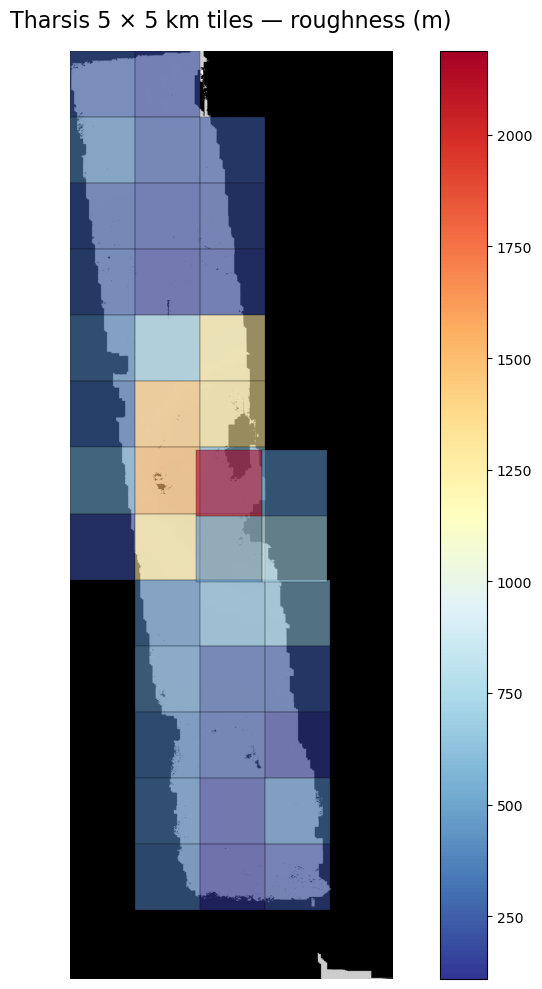

In [27]:
import geopandas as gpd
import matplotlib.pyplot as plt
from rasterio.plot import show

# load your patches
tiles = gpd.read_file("tharsis_tiles_basic_class.geojson")

fig, ax = plt.subplots(1,1, figsize=(10,10))

# 1) show the mosaic as base
show(mosaic, transform=mosaic_transform, ax=ax, cmap="gray", zorder=0)

# 2) overlay your 5×5 km patches, colored by roughness
tiles.plot(
    column="roughness_m",
    cmap="RdYlBu_r",           # blue→red
    legend=True,
    alpha=0.6,
    edgecolor="black",
    linewidth=0.3,
    ax=ax,
    zorder=1
)

ax.set_title("Tharsis 5 × 5 km tiles — roughness (m)", fontsize=16)
ax.set_axis_off()
plt.tight_layout()
plt.show()


In [29]:
import folium
m = folium.Map(
    location=[tiles.geometry.centroid.y.mean(), 
              tiles.geometry.centroid.x.mean()],
    zoom_start=8,
    crs="EPSG3857"  # folium needs Web Mercator
)

# add the mosaic as an image overlay
folium.raster_layers.ImageOverlay(
    image=mosaic[0],           # single band
    bounds=[[ profile["transform"][5] + profile["height"]*profile["transform"][4],
              profile["transform"][2] ],
            [ profile["transform"][5], 
              profile["transform"][2] + profile["width"]*profile["transform"][0] ]],
    opacity=0.7
).add_to(m)

# add each tile as a GeoJson, with popup
for _, r in tiles.iterrows():
    gj = folium.GeoJson(
        r.geometry.__geo_interface__,
        style_function=lambda f, val=r.roughness_m: {
            "fillColor": plt.cm.RdYlBu_r(val / tiles.roughness_m.max()),
            "color": "black",
            "weight": 0.5,
            "fillOpacity": 0.6
        }
    )
    folium.Popup(f"""Tile {r.item_id}<br>
                    roughness {r.roughness_m:.1f} m<br>
                    slope {r.slope_med_deg:.1f}°""")\
        .add_to(gj)
    gj.add_to(m)

m  # will render inline in Jupyter


ModuleNotFoundError: No module named 'folium'

In [31]:
!pip install folium


In [33]:
import folium


C:\Users\Dell\AppData\Local\Temp\ipykernel_10828\52460055.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  location=[tiles.geometry.centroid.y.mean(),
C:\Users\Dell\AppData\Local\Temp\ipykernel_10828\52460055.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tiles.geometry.centroid.x.mean()],



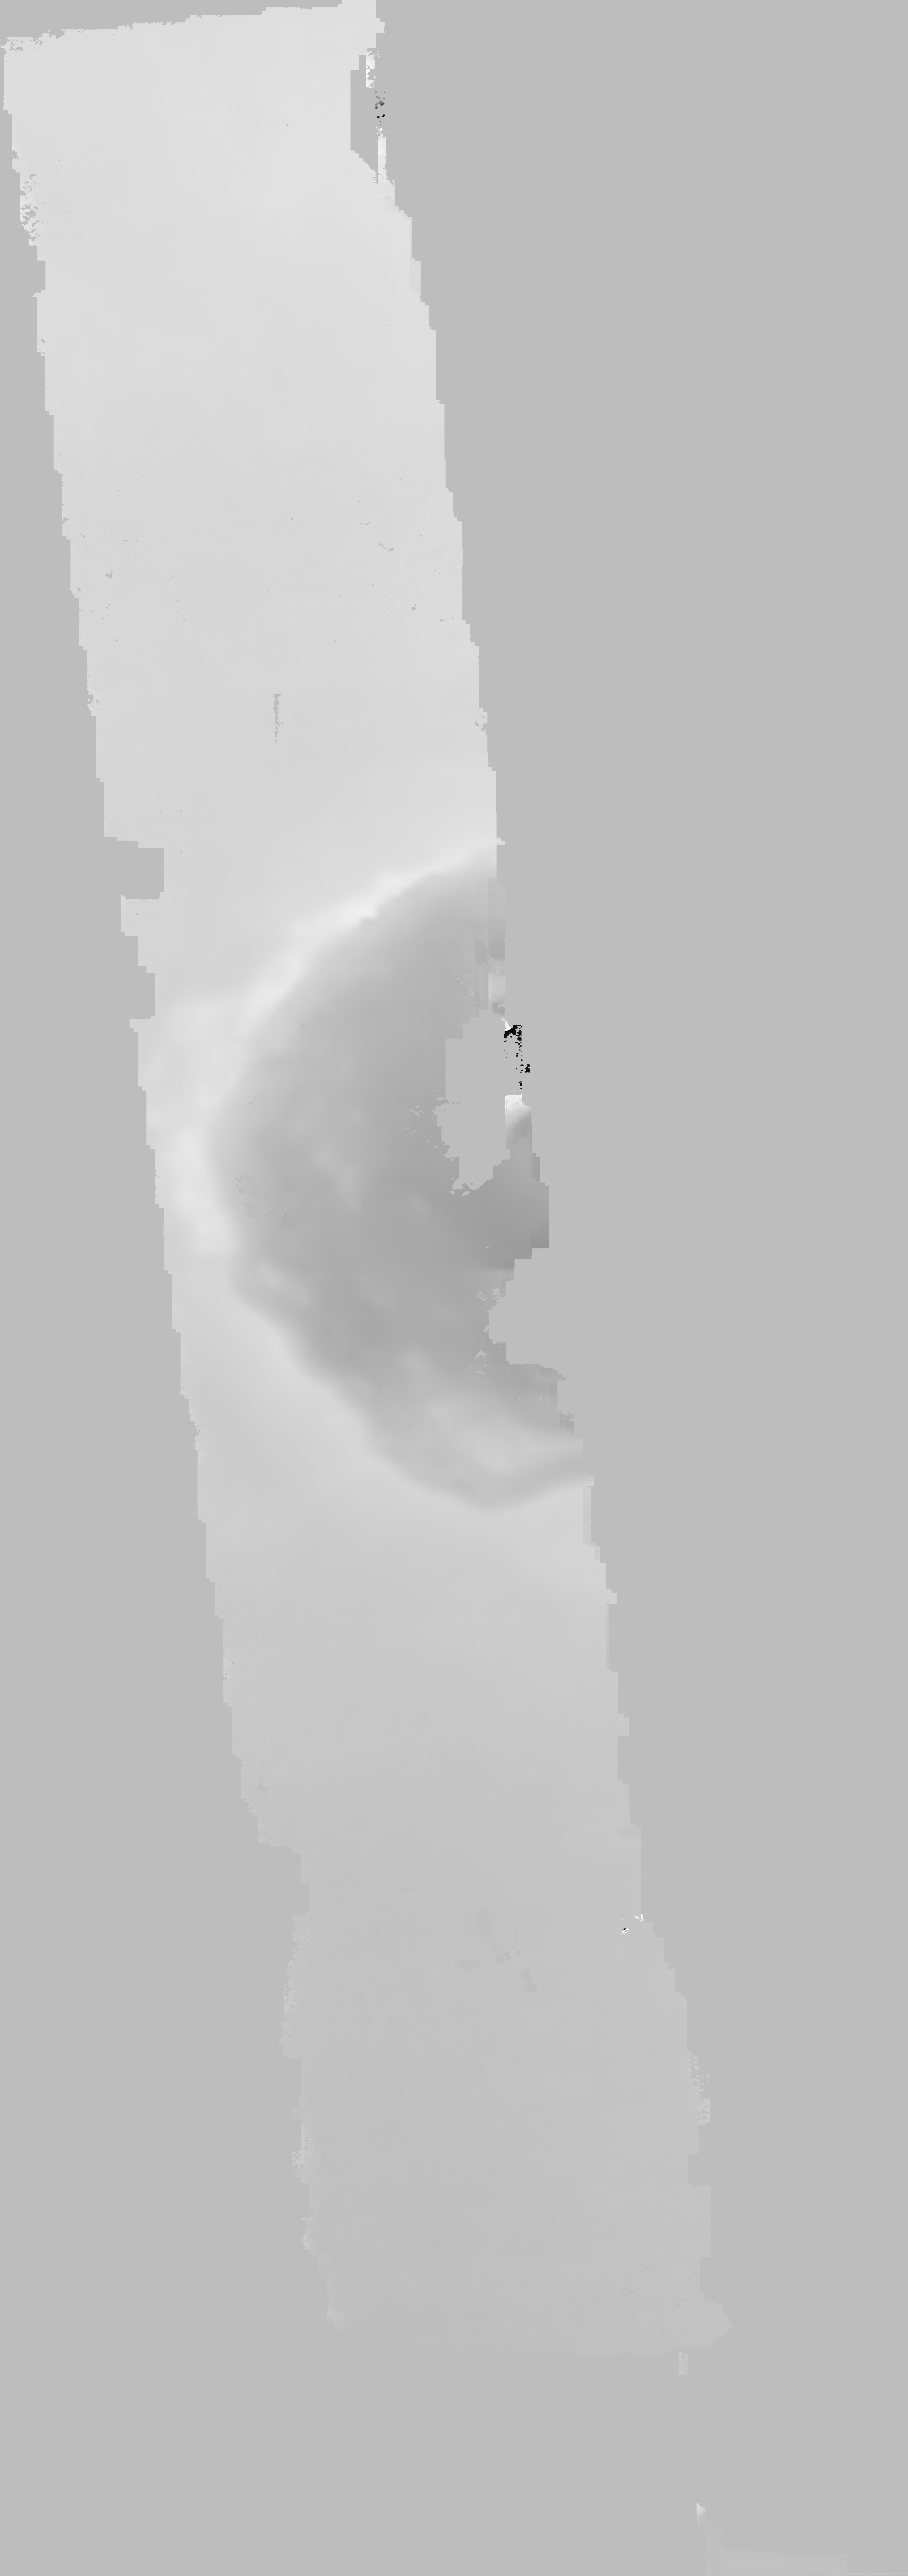

In [35]:
import folium
m = folium.Map(
    location=[tiles.geometry.centroid.y.mean(), 
              tiles.geometry.centroid.x.mean()],
    zoom_start=8,
    crs="EPSG3857"  # folium needs Web Mercator
)

# add the mosaic as an image overlay
folium.raster_layers.ImageOverlay(
    image=mosaic[0],           # single band
    bounds=[[ profile["transform"][5] + profile["height"]*profile["transform"][4],
              profile["transform"][2] ],
            [ profile["transform"][5], 
              profile["transform"][2] + profile["width"]*profile["transform"][0] ]],
    opacity=0.7
).add_to(m)

# add each tile as a GeoJson, with popup
for _, r in tiles.iterrows():
    gj = folium.GeoJson(
        r.geometry.__geo_interface__,
        style_function=lambda f, val=r.roughness_m: {
            "fillColor": plt.cm.RdYlBu_r(val / tiles.roughness_m.max()),
            "color": "black",
            "weight": 0.5,
            "fillOpacity": 0.6
        }
    )
    folium.Popup(f"""Tile {r.item_id}<br>
                    roughness {r.roughness_m:.1f} m<br>
                    slope {r.slope_med_deg:.1f}°""")\
        .add_to(gj)
    gj.add_to(m)

m  # will render inline in Jupyter


C:\Users\Dell\anaconda3\Lib\site-packages\pystac_client\item_search.py:881: FutureWarning: get_items() is deprecated, use items() instead
  warnings.warn(


ProjError: Error creating Transformer from CRS.: (Internal Proj Error: proj_create_operations: Source and target ellipsoid do not belong to the same celestial body (Mars vs Earth). You may override this check by setting the PROJ_IGNORE_CELESTIAL_BODY environment variable to YES.)

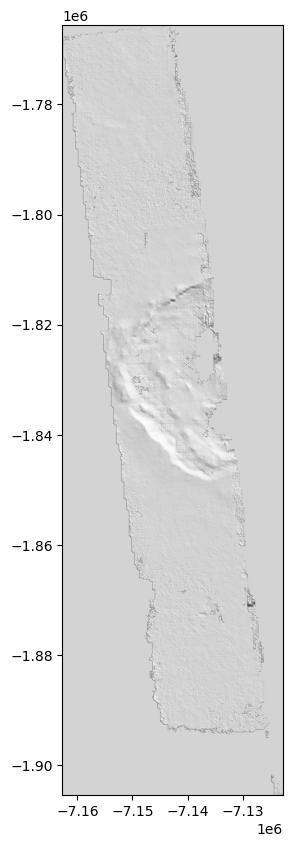

In [37]:
import geopandas as gpd
import rasterio
from rasterio.merge import merge
from planetary_computer import sign
from pystac_client import Client
import matplotlib.pyplot as plt
import numpy as np

# 1) Load your patches
patches = gpd.read_file("tharsis_tiles_basic_class.geojson")

# 2) Fetch & merge the CTX DEMs
usgs = Client.open("https://stac.astrogeology.usgs.gov/api/")
items = list(usgs.search(
    collections=["mro_ctx_controlled_usgs_dtms"],
    bbox=[-120.85, -30.85, -119.15, -29.15]
).get_items())
srcs = [rasterio.open(sign(it.assets["dem"].href)) for it in items]
mosaic, out_trans = merge(srcs)

# 3) Make a quick hillshade
dx, dy = np.gradient(mosaic[0], srcs[0].res[0], srcs[0].res[1])
slope = np.pi/2. - np.arctan(np.hypot(dx, dy))
az, alt = 315*np.pi/180., 45*np.pi/180.
hill = (np.sin(alt)*np.sin(slope) +
        np.cos(alt)*np.cos(slope)*np.cos(az - np.arctan2(dy, dx)))

# 4) Plot everything
fig, ax = plt.subplots(1,1, figsize=(10,10))
extent = [
    out_trans.c,
    out_trans.c + mosaic.shape[2]*out_trans.a,
    out_trans.f + mosaic.shape[1]*out_trans.e,
    out_trans.f
]
ax.imshow(hill, cmap="gray", extent=extent, origin="upper")

# 5) Color‐map your patches by roughness
patches = patches.to_crs(srcs[0].crs)
norm   = plt.Normalize(vmin=patches["roughness_m"].min(),
                       vmax=patches["roughness_m"].max())
cmap   = plt.cm.get_cmap("RdYlBu_r")
patches.plot(
    ax=ax,
    facecolor=patches["roughness_m"]
                     .map(lambda v: cmap(norm(v)) if not np.isnan(v) else (0,0,0,0)),
    edgecolor="black",
    linewidth=0.3
)

# 6) Add a legend
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm._A = []
cbar = fig.colorbar(sm, ax=ax, fraction=0.036, pad=0.04)
cbar.set_label("Roughness (m)")

ax.set_title("Tharsis 5×5 km Tiles: Roughness over CTX Hillshade")
ax.axis("off")
plt.show()


C:\Users\Dell\anaconda3\Lib\site-packages\pystac_client\item_search.py:881: FutureWarning: get_items() is deprecated, use items() instead
  warnings.warn(
C:\Users\Dell\AppData\Local\Temp\ipykernel_10828\1847267304.py:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("RdYlBu_r")


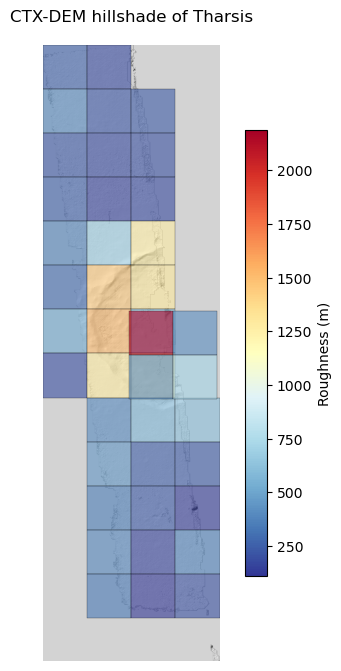

In [39]:
import os
os.environ["PROJ_IGNORE_CELESTIAL_BODY"] = "YES"

from pystac_client import Client
from planetary_computer import sign
import rasterio
from rasterio.merge import merge
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

# 1) Re-search CTX DEMs over your Tharsis box
usgs = Client.open("https://stac.astrogeology.usgs.gov/api/")
items = list(
    usgs.search(
        collections=["mro_ctx_controlled_usgs_dtms"],
        bbox=[-120.85, -30.85, -119.15, -29.15],
    ).get_items()
)

# 2) Open & sign each DEM tile
srcs = []
for it in items:
    href = sign(it.assets["dem"].href)   # “dem” asset key may vary—inspect it if you KeyError
    srcs.append(rasterio.open(href))

# 3) Mosaic them into one big array
mosaic, out_trans = merge(srcs)

# 4) Compute hillshade
#   x, y gradients in elevation
dx, dy = np.gradient(mosaic[0], srcs[0].res[0], srcs[0].res[1])
slope  = np.pi/2.0 - np.arctan(np.hypot(dx, dy))
aspect = np.arctan2(-dx, dy)
#   illumination from 45° elevation, 315° azimuth
hillshade = (np.sin(np.radians(45)) * np.sin(slope) +
             np.cos(np.radians(45)) * np.cos(slope) *
             np.cos(np.radians(315) - aspect))

# 5) Plot the hillshade
fig, ax = plt.subplots(1,1,figsize=(8,8))
# compute extent in map units
left   = out_trans.c
bottom = out_trans.f + mosaic.shape[1]*out_trans.e
right  = out_trans.c + mosaic.shape[2]*out_trans.a
top    = out_trans.f
ax.imshow(hillshade, cmap="gray", extent=[left, right, bottom, top], origin="upper")
ax.set_title("CTX-DEM hillshade of Tharsis")
ax.axis("off")

# 6) Overlay your patched tiles (with “roughness_m” already computed)
patches = gpd.read_file("tharsis_tiles_basic_class.geojson")
# label them into the same CRS (no reprojection math)
patches = patches.set_crs(srcs[0].crs, allow_override=True)

# color by roughness
norm = plt.Normalize(vmin=patches["roughness_m"].min(), vmax=patches["roughness_m"].max())
cmap = plt.cm.get_cmap("RdYlBu_r")
patches.plot(
    ax=ax,
    facecolor=patches["roughness_m"]
                     .map(lambda v: cmap(norm(v)) if not np.isnan(v) else (0,0,0,0)),
    edgecolor="black",
    linewidth=0.3,
    alpha=0.6
)

# 7) Add a colorbar
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm._A = []
cbar = fig.colorbar(sm, ax=ax, fraction=0.036, pad=0.04)
cbar.set_label("Roughness (m)")

plt.show()


In [41]:
from rasterio.merge import merge
import rasterio, glob

# 1) Open all of your CTX DEM tiles:
dem_files = glob.glob("data/ctx_tharsis/*.tif")
srcs      = [rasterio.open(fp) for fp in dem_files]

# 2) Merge them into one big array + transform:
mosaic, out_trans = merge(srcs)

# 3) Inspect to confirm:
print("Mosaic shape:", mosaic.shape)         # e.g. (1, rows, cols)
print("Transform:", out_trans)               # affine mapping pixel→world
print("CRS:", srcs[0].crs)                   # your Mars CRS


IndexError: list index out of range

In [43]:
import glob

# try both your raw CTX folder and your 10 km‐tile folder:
for pattern in ["data/ctx_tharsis/*.tif", "data/ctx_tharsis_10km_tiles/*.tif"]:
    matches = glob.glob(pattern)
    print(pattern, "→", len(matches), "files")


data/ctx_tharsis/*.tif → 0 files
data/ctx_tharsis_10km_tiles/*.tif → 94 files


Found 94 tiles; merging…
 → mosaic.shape: (1, 7018, 2474)
 → CRS: IAU_2015:49910


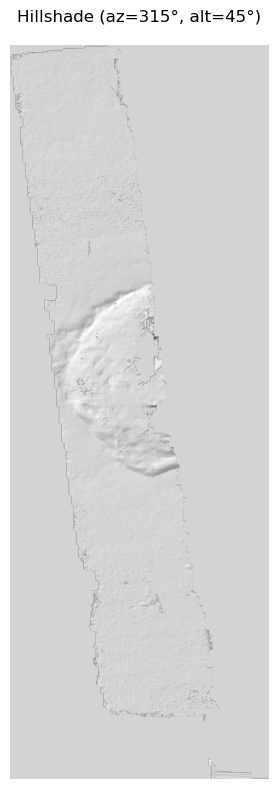

In [45]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.merge import merge
from rasterio.plot import show

# 1) Find & open your 10 km tiles
dem_pattern = "data/ctx_tharsis_10km_tiles/*.tif"
dem_files   = glob.glob(dem_pattern)
print("Found", len(dem_files), "tiles; merging…")

srcs = [rasterio.open(fp) for fp in dem_files]

# 2) Mosaic them into a single array + affine transform
mosaic, out_trans = merge(srcs)
print(" → mosaic.shape:", mosaic.shape)
print(" → CRS:", srcs[0].crs)

# 3) Compute a simple hillshade
band    = mosaic[0]                 # single‐band DEM
dx, dy  = np.gradient(band, out_trans.a, -out_trans.e)
slope   = np.pi/2 - np.arctan(np.hypot(dx, dy))
aspect  = np.arctan2(dy, -dx)
az, alt = 315, 45  # illumination azimuth / altitude
hill    = (np.sin(np.radians(alt)) * np.sin(slope) +
           np.cos(np.radians(alt)) * np.cos(slope) *
           np.cos(np.radians(az) - aspect))

# 4) Plot
fig, ax = plt.subplots(figsize=(10, 8))
show(hill, transform=out_trans, cmap="gray", ax=ax)
ax.set_title(f"Hillshade (az={az}°, alt={alt}°)")
ax.axis("off")
plt.tight_layout()


AttributeError: 'Affine' object has no attribute 'to_dict'

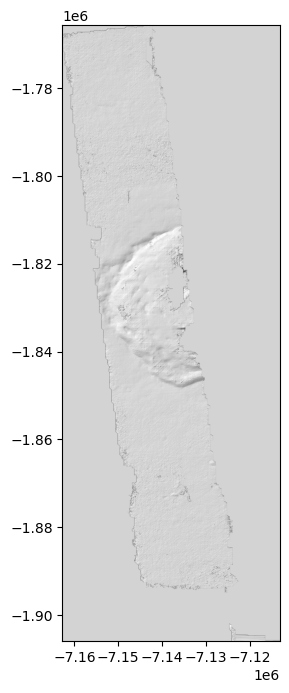

In [47]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.merge import merge
from rasterio.plot import show as rioshow
import geopandas as gpd

# 1) Point to your on‐disk tiles
dem_files = glob.glob("data/ctx_tharsis_10km_tiles/*.tif")
if len(dem_files)==0:
    raise FileNotFoundError("No tiles found! Check your path: data/ctx_tharsis_10km_tiles/")

# 2) Merge into one big DEM
srcs = [rasterio.open(fp) for fp in dem_files]
mosaic, out_trans = merge(srcs)

# 3) Generate a hillshade
band    = mosaic[0].astype(float)
dx, dy  = np.gradient(band, out_trans.a, -out_trans.e)
slope   = np.pi/2 - np.arctan(np.hypot(dx, dy))
aspect  = np.arctan2(dy, -dx)
az, alt = 315, 45
hill    = (np.sin(np.radians(alt)) * np.sin(slope) +
           np.cos(np.radians(alt)) * np.cos(slope) *
           np.cos(np.radians(az) - aspect))

# 4) Load your patch GeoDataFrame (must have a 'roughness_m' column)
patches = gpd.read_file("tharsis_tiles_basic_class.geojson")  # adjust filename as needed

# 5) Plot
fig, ax = plt.subplots(figsize=(10,8))
rioshow(hill, transform=out_trans, cmap="gray", ax=ax)
patches.to_crs(out_trans.to_dict(), inplace=True)  # reproject patches into DEM CRS
patches.plot(
    column="roughness_m",
    cmap="coolwarm",
    alpha=0.6,
    edgecolor="black",
    linewidth=0.3,
    legend=True,
    ax=ax
)
ax.set_title("CTX Hillshade + Tile Roughness (blue=low, red=high)")
ax.axis("off")
plt.tight_layout()
plt.show()


In [49]:
import math
import glob
import numpy as np
import pandas as pd
import rasterio
from rasterio.windows import Window

# 1) Read your tile‐level features and find the tile with max roughness
feats = pd.read_csv("tile_features.csv")  
# (must have columns: tile, roughness_m)
max_tile = feats.sort_values("roughness_m", ascending=False).iloc[0]["tile"]
print(">>> Highest-roughness tile is:", max_tile)

# 2) Open that tile
tile_fp = f"data/ctx_tharsis_10km_tiles/{max_tile}"
with rasterio.open(tile_fp) as src:
    dem      = src.read(1, masked=True).astype(float)
    t        = src.transform
    px_deg   = src.res[0]         # degrees per pixel in X
    # approximate meters per degree at Mars ~58 900 m
    m_per_deg = 58900.0          
    px_m      = px_deg * m_per_deg
    w_px      = src.width
    h_px      = src.height

# 3) define the set of target subdivision sizes (in meters)
resolutions = [1000, 500, 250, 125, 62.5, 31.25, 15.625, 7.8125, 3.90625, 1.953125]

def compute_slope(arr, pixel_size):
    # simple finite‐difference slope in degrees
    dy, dx = np.gradient(arr, pixel_size, pixel_size)
    sl = np.degrees(np.arctan(np.hypot(dx, dy)))
    return sl

records = []
with rasterio.open(tile_fp) as src:
    for R in resolutions:
        # how many pixels per side for this resolution?
        win_px = max(1, int(round(R/px_m)))
        nx     = w_px // win_px
        ny     = h_px // win_px
        print(f"– {R:7.3f} m tiles → {nx}×{ny} = {nx*ny} patches")
        for i in range(nx):
            for j in range(ny):
                win = Window(i*win_px, j*win_px, win_px, win_px)
                sub = src.read(1, window=win, masked=True).astype(float)
                if np.all(sub.mask):
                    continue
                sl   = compute_slope(sub, px_m)
                rough= float(np.nanmax(sub) - np.nanmin(sub))
                records.append({
                    "resolution_m": R,
                    "i":            i,
                    "j":            j,
                    "slope_med":    float(np.nanmedian(sl)),
                    "roughness_m":  rough
                })

df_sub = pd.DataFrame(records)
print("\nGenerated", len(df_sub), "sub‐tile measurements.")
df_sub.head(10)


>>> Highest-roughness tile is: K15_059399_1488_XN_31S120W__K05_055192_1489_XN_31S120W_r00_c00.tif
– 1000.000 m tiles → 500×500 = 250000 patches


ValueError: Shape of array too small to calculate a numerical gradient, at least (edge_order + 1) elements are required.

In [51]:
from pystac_client import Client
from planetary_computer import sign
import os, requests

# 1) open Planetary Computer
pc = Client.open("https://planetarycomputer.microsoft.com/api/stac/v1")

# 2) define your Tharsis bbox (in east-long wrapped into [-180,180])
bbox = [-150, -60, -90, 0]

# 3) search the MOLA global DEM collection
search = pc.search(
    collections=["mola-dem"],
    bbox=bbox
)
items = list(search.get_items())
print(f"Found {len(items)} MOLA tiles")

# 4) download them as GeoTIFFs
out_dir = "data/mola_dem"
os.makedirs(out_dir, exist_ok=True)

for item in items:
    href = sign(item.assets["data"].href)   # GeoTIFF URL
    fn   = os.path.join(out_dir, f"{item.id}.tif")
    if not os.path.exists(fn):
        print("→", item.id)
        r = requests.get(href, stream=True); r.raise_for_status()
        with open(fn, "wb") as f:
            for chunk in r.iter_content(8192):
                f.write(chunk)


Found 0 MOLA tiles


C:\Users\Dell\anaconda3\Lib\site-packages\pystac_client\item_search.py:881: FutureWarning: get_items() is deprecated, use items() instead
  warnings.warn(


In [53]:
import rasterio
from rasterio.windows import Window
import numpy as np
import pandas as pd

# 1.1 point at your “roughest” 10 km CTX tile
tile_fp = "data/ctx_tharsis_10km_tiles/K15_059399_1488_XN_31S120W__K05_055192_1489_XN_31S120W_r00_c00.tif"

# 1.2 open it
src = rasterio.open(tile_fp)
dem = src.read(1, masked=True).astype(float)

# quick check
print(f"Tile {tile_fp} → size = {src.width}×{src.height} px, resolution ≃{src.res[0]:.1f} m/px")


Tile data/ctx_tharsis_10km_tiles/K15_059399_1488_XN_31S120W__K05_055192_1489_XN_31S120W_r00_c00.tif → size = 500×500 px, resolution ≃20.0 m/px


In [55]:
def compute_features(arr, pixel_size):
    """Given a 2D NumPy masked‐array and pixel size in meters,
       return (median_slope_deg, elev_range_m)."""
    # slope from finite‐difference gradient
    dy, dx = np.gradient(arr.filled(np.nan), pixel_size, pixel_size)
    slope = np.degrees(np.hypot(dx, dy))
    # roughness = max–min of elevation
    elev = arr.filled(np.nan)
    elev_range = np.nanmax(elev) - np.nanmin(elev)
    return float(np.nanmedian(slope)), float(elev_range)


In [57]:
# the resolutions you want (meters)
levels = [1000, 500, 250, 125, 62.5]  

results = []

for R in levels:
    # how many pixels per patch
    px_per_patch = int(R / src.res[0])

    n_rows = src.height  // px_per_patch
    n_cols = src.width   // px_per_patch

    for i in range(n_rows):
        for j in range(n_cols):
            win = Window(j*px_per_patch, i*px_per_patch, px_per_patch, px_per_patch)
            sub = src.read(1, window=win, masked=True).astype(float)

            # skip fully‐masked windows
            if np.all(sub.mask):
                continue

            slope_med, rough = compute_features(sub, src.res[0])
            results.append({
                "level_m":       R,
                "row_index":     i,
                "col_index":     j,
                "slope_med_deg": slope_med,
                "roughness_m":   rough,
                # compute a little geometry for plotting later if you like:
                **rasterio.windows.bounds(win, src.transform)._asdict()
            })


AttributeError: 'tuple' object has no attribute '_asdict'

In [59]:
results = []

for R in levels:
    px_per_patch = int(R / src.res[0])
    n_rows = src.height  // px_per_patch
    n_cols = src.width   // px_per_patch

    for i in range(n_rows):
        for j in range(n_cols):
            win = Window(j*px_per_patch, i*px_per_patch, px_per_patch, px_per_patch)
            sub = src.read(1, window=win, masked=True).astype(float)
            if np.all(sub.mask):
                continue

            slope_med, rough = compute_features(sub, src.res[0])

            # unpack the 4-tuple into named fields
            left, bottom, right, top = rasterio.windows.bounds(win, src.transform)

            results.append({
                "level_m":       R,
                "row_index":     i,
                "col_index":     j,
                "slope_med_deg": slope_med,
                "roughness_m":   rough,
                "xmin":          left,
                "ymin":          bottom,
                "xmax":          right,
                "ymax":          top
            })

df = pd.DataFrame(results)
print(df.groupby("level_m").size())


C:\Users\Dell\AppData\Local\Temp\ipykernel_10828\1185172473.py:10: RuntimeWarning: All-NaN slice encountered
  return float(np.nanmedian(slope)), float(elev_range)


level_m
62.5      937
125.0     312
250.0     128
500.0      45
1000.0     16
dtype: int64


In [61]:
import pandas as pd

# assume `df` is your DataFrame of all results with columns
# ['level_m','row_index','col_index','slope_med_deg','roughness_m','xmin','ymin','xmax','ymax']

# pivot slope and roughness into columns like slope_62.5, roughness_62.5, …
wide = df.pivot_table(
    index=['row_index','col_index','xmin','ymin','xmax','ymax'],
    columns='level_m',
    values=['slope_med_deg','roughness_m']
)

# flatten the MultiIndex in columns
wide.columns = [f"{feat}_{int(res)}m" for feat,res in wide.columns]
wide = wide.reset_index()

print("Wide table:", wide.shape)
wide.head()


Wide table: (1438, 16)


,row_index,col_index,xmin,ymin,xmax,ymax,roughness_m_62m,roughness_m_125m,roughness_m_250m,roughness_m_500m,roughness_m_1000m,slope_med_deg_62m,slope_med_deg_125m,slope_med_deg_250m,slope_med_deg_500m,slope_med_deg_1000m
0,0,0,-7143250.0,-1766950.0,-7142250.0,-1765950.0,NaN,NaN,NaN,NaN,804.654297,NaN,NaN,NaN,NaN,43.10876
1,0,0,-7143250.0,-1766450.0,-7142750.0,-1765950.0,NaN,NaN,NaN,269.417969,NaN,NaN,NaN,NaN,25.905573,NaN
2,0,0,-7143250.0,-1766190.0,-7143010.0,-1765950.0,NaN,NaN,157.664062,NaN,NaN,NaN,NaN,7.331721,NaN,NaN
3,0,0,-7143250.0,-1766070.0,-7143130.0,-1765950.0,NaN,155.537109,NaN,NaN,NaN,NaN,8.034037,NaN,NaN,NaN
4,0,0,-7143250.0,-1766010.0,-7143190.0,-1765950.0,2.15332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
[row, col, xmin,ymin,xmax,ymax, 
 slope_62m, slope_125m, …, roughness_62m, roughness_125m, … ]


SyntaxError: invalid character '…' (U+2026) (2215396334.py, line 2)

In [65]:
import geopandas as gpd
from shapely.geometry import box

# build geometries
wide['geometry'] = wide.apply(lambda r: box(r.xmin, r.ymin, r.xmax, r.ymax), axis=1)

gdf = gpd.GeoDataFrame(wide, geometry='geometry', crs=src.crs)
gdf.head()


,row_index,col_index,xmin,ymin,xmax,ymax,roughness_m_62m,roughness_m_125m,roughness_m_250m,roughness_m_500m,roughness_m_1000m,slope_med_deg_62m,slope_med_deg_125m,slope_med_deg_250m,slope_med_deg_500m,slope_med_deg_1000m,geometry
0,0,0,-7143250.0,-1766950.0,-7142250.0,-1765950.0,NaN,NaN,NaN,NaN,804.654297,NaN,NaN,NaN,NaN,43.10876,"POLYGON ((-7142250 -1766950, -7142250 -1765950..."
1,0,0,-7143250.0,-1766450.0,-7142750.0,-1765950.0,NaN,NaN,NaN,269.417969,NaN,NaN,NaN,NaN,25.905573,NaN,"POLYGON ((-7142750 -1766450, -7142750 -1765950..."
2,0,0,-7143250.0,-1766190.0,-7143010.0,-1765950.0,NaN,NaN,157.664062,NaN,NaN,NaN,NaN,7.331721,NaN,NaN,"POLYGON ((-7143010 -1766190, -7143010 -1765950..."
3,0,0,-7143250.0,-1766070.0,-7143130.0,-1765950.0,NaN,155.537109,NaN,NaN,NaN,NaN,8.034037,NaN,NaN,NaN,"POLYGON ((-7143130 -1766070, -7143130 -1765950..."
4,0,0,-7143250.0,-1766010.0,-7143190.0,-1765950.0,2.15332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-7143190 -1766010, -7143190 -1765950..."


NameError: name 'bounds' is not defined

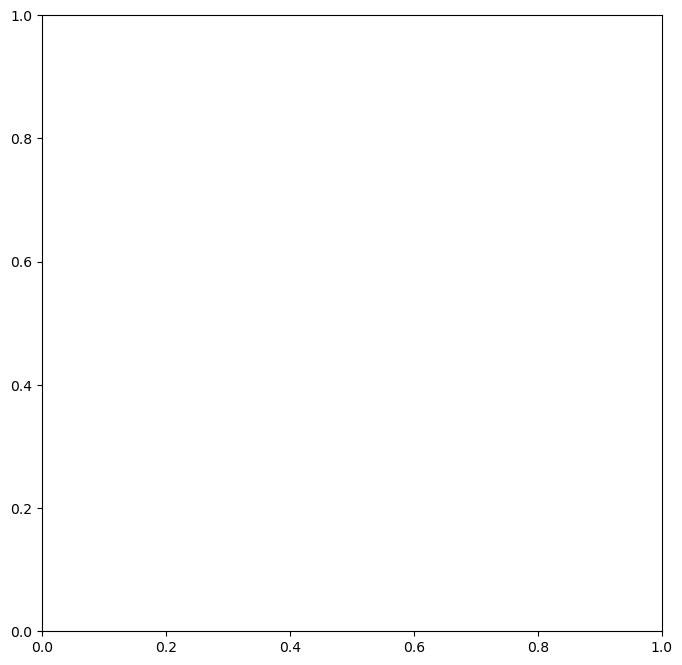

In [67]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(8,8))
# plot hillshade background
ax.imshow(
    hillshade,  # your merged hillshade array
    cmap='gray',
    extent=(bounds.left, bounds.right, bounds.bottom, bounds.top),
    origin='upper'
)

# overlay the 62 m slope
gdf.plot(
    column='slope_med_deg_62m',
    cmap='RdYlBu_r',
    scheme='quantiles',
    k=5,
    legend=True,
    alpha=0.6,
    ax=ax
)

ax.set_title("62 m patch median slope")
ax.axis('off');


In [69]:
from rasterio.transform import array_bounds

# suppose `hillshade` is your 2D NumPy array (shape rows×cols)
# and `out_trans` is the Affine transform you got when merging:

rows, cols = hillshade.shape
left, bottom, right, top = array_bounds(rows, cols, out_trans)


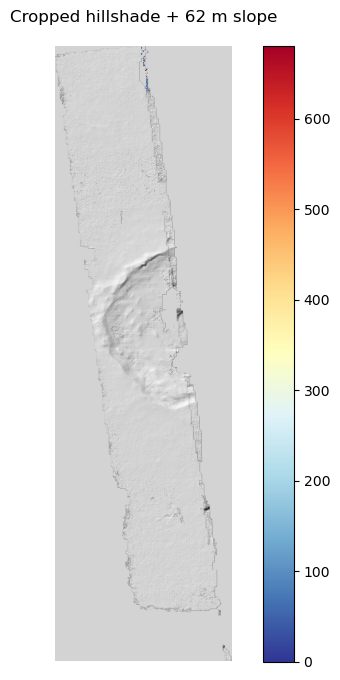

In [71]:
import numpy as np

# mask out nodata & find the tightest window of real data
mask = ~np.isnan(hillshade)
ys, xs = np.where(mask)
row0, row1 = ys.min(), ys.max()
col0, col1 = xs.min(), xs.max()

sub = hillshade[row0:row1+1, col0:col1+1]

# compute transform for the cropped window
from affine import Affine
sub_trans = out_trans * Affine.translation(col0, row0)

# recompute bounds for the subwindow
r2, c2 = sub.shape
l2, b2, r2x, t2 = array_bounds(r2, c2, sub_trans)

# now plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(8,8))

ax.imshow(
    sub,
    cmap="gray",
    extent=(l2, r2x, b2, t2),
    origin="upper"
)

# overlay e.g. your 62 m slope patches:
gdf.plot(
    column="slope_med_deg_62m",
    cmap="RdYlBu_r",
    legend=True,
    alpha=0.6,
    ax=ax
)

ax.set_title("Cropped hillshade + 62 m slope")
ax.axis("off")
plt.show()


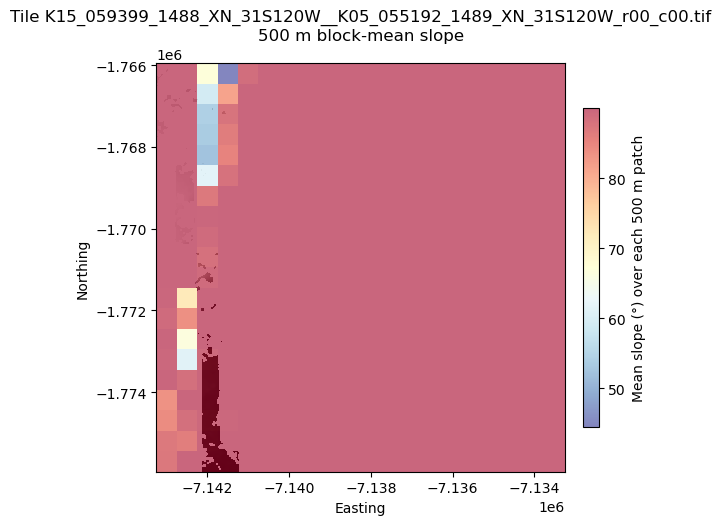

In [73]:
import rasterio
from rasterio.plot import show
from rasterio.transform import array_bounds
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce

# 1) Open your “highest‐roughness” tile
tile_fp = "data/ctx_tharsis_10km_tiles/K15_059399_1488_XN_31S120W__K05_055192_1489_XN_31S120W_r00_c00.tif"
with rasterio.open(tile_fp) as src:
    dem = src.read(1, masked=True).astype(float)
    transform = src.transform
    res = src.res[0]   # meters per pixel
    crs = src.crs

# 2) Compute per‐pixel slope (in degrees)
dx, dy = np.gradient(dem, res, res)
slope = np.degrees(np.arctan(np.hypot(dx, dy)))

# 3) Compute the geographic bounds of the full tile for plotting
rows, cols = slope.shape
left, bottom, right, top = array_bounds(rows, cols, transform)

# Function to block‐reduce to an arbitrary block size (in meters)
def slope_block(slope_arr, native_res, block_m):
    """Reduce slope_arr by averaging each block_m×block_m tile."""
    block_px = int(block_m / native_res)
    if block_px < 1:
        raise ValueError("block size smaller than native resolution")
    # use mean over each block
    return block_reduce(slope_arr, block_size=(block_px, block_px), func=np.nanmean)

# 4) Choose your target coarse scale, e.g. 500 m
block_size = 500

coarse = slope_block(slope, res, block_size)

# 5) Compute the bounds of that coarse grid
#    we need an extent for pcolormesh: the edges in X and Y
nrows, ncols = coarse.shape
# X edges from left to right
x_edges = np.linspace(left, right, ncols+1)
# Y edges from bottom to top (note: pcolormesh wants the ascending y array)
y_edges = np.linspace(bottom, top, nrows+1)

# 6) Plot!
fig, ax = plt.subplots(1,1, figsize=(6,8))

# (a) background DEM or hillshade in gray
show(dem, transform=transform, ax=ax, cmap="gray", zorder=1)

# (b) the coarse‐slope overlay
mesh = ax.pcolormesh(
    x_edges, y_edges, coarse,
    cmap="RdYlBu_r",
    shading="auto",
    alpha=0.6,
    zorder=2
)
cbar = fig.colorbar(mesh, ax=ax, fraction=0.036, pad=0.04)
cbar.set_label("Mean slope (°) over each 500 m patch")

ax.set_title(f"Tile {tile_fp.split('/')[-1]}\n500 m block‐mean slope")
ax.set_xlabel("Easting")
ax.set_ylabel("Northing")
plt.tight_layout()
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_10828\1472832093.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  global_centroid = patches.geometry.centroid.unary_union.centroid
C:\Users\Dell\AppData\Local\Temp\ipykernel_10828\1472832093.py:13: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  global_centroid = patches.geometry.centroid.unary_union.centroid
C:\Users\Dell\AppData\Local\Temp\ipykernel_10828\1472832093.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  patches["dist2center"] = patches.geometry.centroid.distance(global_centroid)
C:\Users\Dell\AppData\Local\Temp\ipykernel_10828\1472832093.py:14: UserWarning: Geometry is in a geographic CRS. Re

Selected center tile: K15_059399_1488_XN_31S120W__K05_055192_1489_XN_31S120W_r06_c00.tif


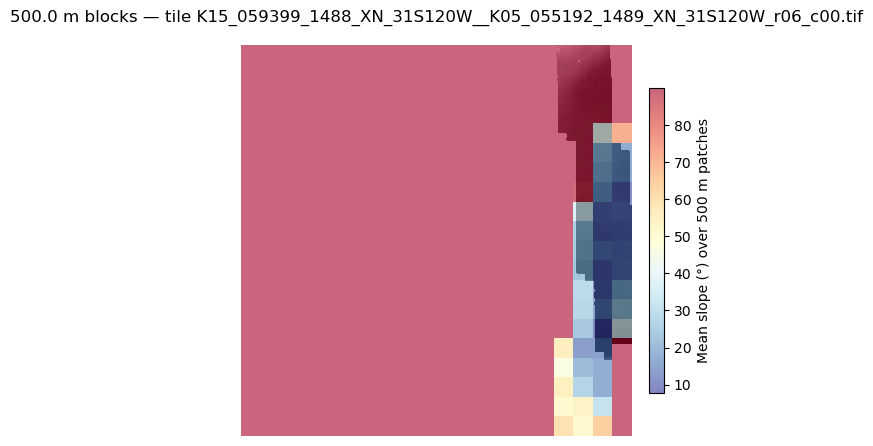

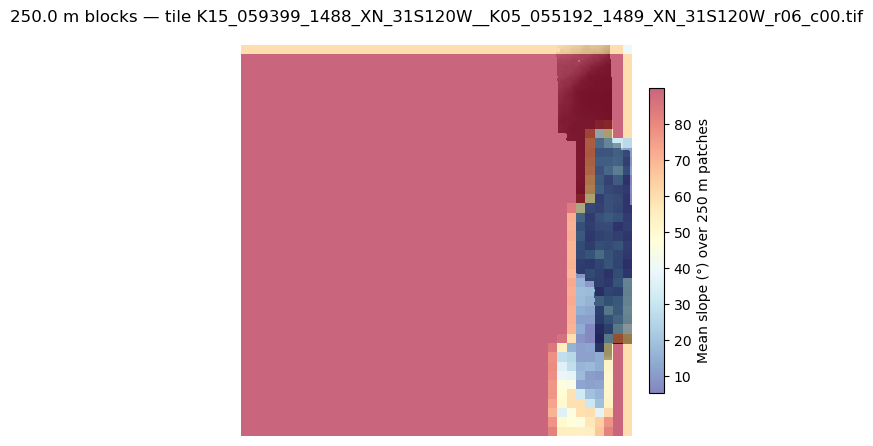

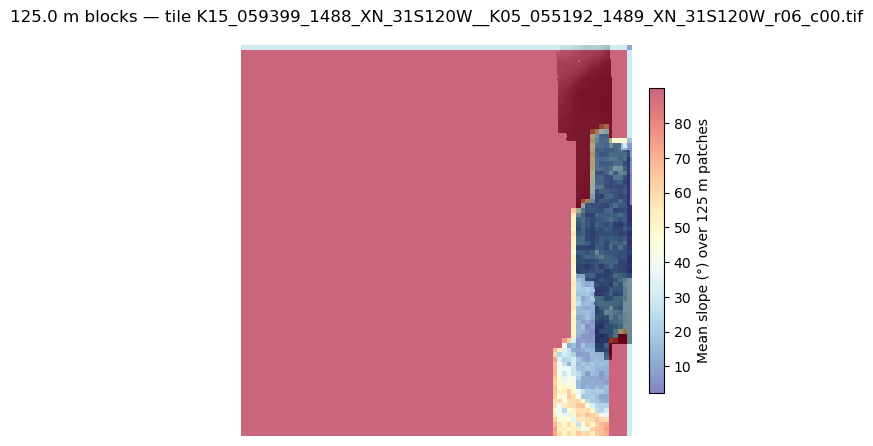

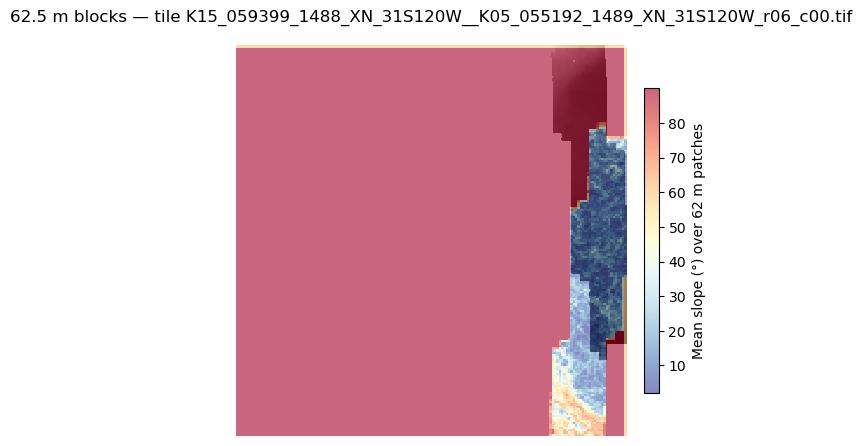

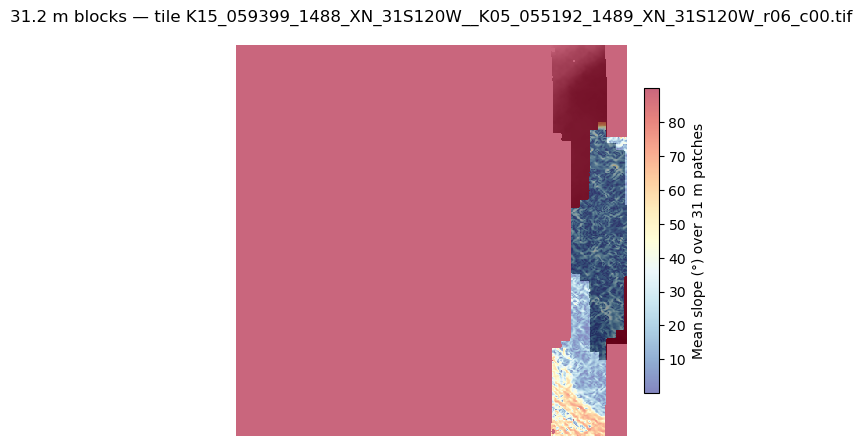

ValueError: Down-sampling factors must be >= 1. Use `skimage.transform.resize` to up-sample an image.

In [75]:
import rasterio
from rasterio.plot import show
from rasterio.transform import array_bounds
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce
import geopandas as gpd

# 1) Load your patches GeoDataFrame
patches = gpd.read_file("tharsis_tiles_basic_class.geojson")  # or wherever you saved it

# 2) Compute the “global” centroid and find the patch whose centroid is nearest
global_centroid = patches.geometry.centroid.unary_union.centroid
patches["dist2center"] = patches.geometry.centroid.distance(global_centroid)
center_patch = patches.sort_values("dist2center").iloc[0]
tile_name   = center_patch["item_id"] + ".tif"
tile_fp     = f"data/ctx_tharsis_10km_tiles/{tile_name}"

print("Selected center tile:", tile_name)

# 3) Open that tile, compute DEM and per-pixel slope
with rasterio.open(tile_fp) as src:
    dem       = src.read(1, masked=True).astype(float)
    transform = src.transform
    native_res= src.res[0]   # meters per pixel

# per-pixel slope (°)
dx, dy = np.gradient(dem, native_res, native_res)
slope  = np.degrees(np.arctan(np.hypot(dx, dy)))

# full-tile bounds for plotting
rows, cols = slope.shape
left, bottom, right, top = array_bounds(rows, cols, transform)

# helper to aggregate to blocks of size B (in meters)
def block_slope(arr, res, B):
    px = int(B/res)
    return block_reduce(arr, block_size=(px,px), func=np.nanmean)

# 4) Drill down: choose whichever block size you like (500→250→125→…→2)
for B in (500, 250, 125, 62.5, 31.25, 15.625, 7.8125, 3.90625, 1.953125):
    coarse = block_slope(slope, native_res, B)
    nrows, ncols = coarse.shape
    x_edges = np.linspace(left, right, ncols+1)
    y_edges = np.linspace(bottom, top, nrows+1)

    fig, ax = plt.subplots(1,1, figsize=(5,8))
    # background hillshade
    show(dem, transform=transform, ax=ax, cmap="gray", zorder=1)
    # overlay coarse slope
    mesh = ax.pcolormesh(
        x_edges, y_edges, coarse,
        cmap="RdYlBu_r", shading="auto", alpha=0.6, zorder=2
    )
    cbar = fig.colorbar(mesh, ax=ax, fraction=0.036, pad=0.04)
    cbar.set_label(f"Mean slope (°) over {int(B)} m patches")
    ax.set_title(f"{B:.1f} m blocks — tile {tile_name}")
    ax.set_axis_off()
    plt.tight_layout()
    plt.show()


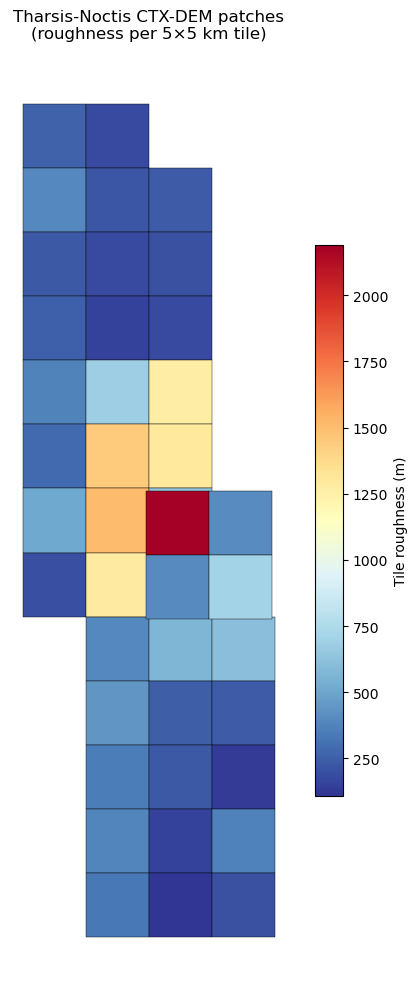

In [77]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 1) load the GeoJSON you saved after computing roughness
patches = gpd.read_file("tharsis_tiles_basic_class.geojson")  
# (replace with whatever filename you used)

# 2) make sure your roughness column is numeric
patches["roughness_m"] = patches["roughness_m"].astype(float)

# 3) plot a simple choropleth
fig, ax = plt.subplots(1, 1, figsize=(6, 10))
patches.plot(
    column="roughness_m",
    cmap="RdYlBu_r",
    linewidth=0.3,
    edgecolor="black",
    legend=True,
    legend_kwds={
        "label": "Tile roughness (m)",
        "shrink": 0.6,
    },
    ax=ax,
)
ax.set_title("Tharsis-Noctis CTX-DEM patches\n(roughness per 5×5 km tile)")
ax.set_axis_off()
plt.tight_layout()
plt.show()


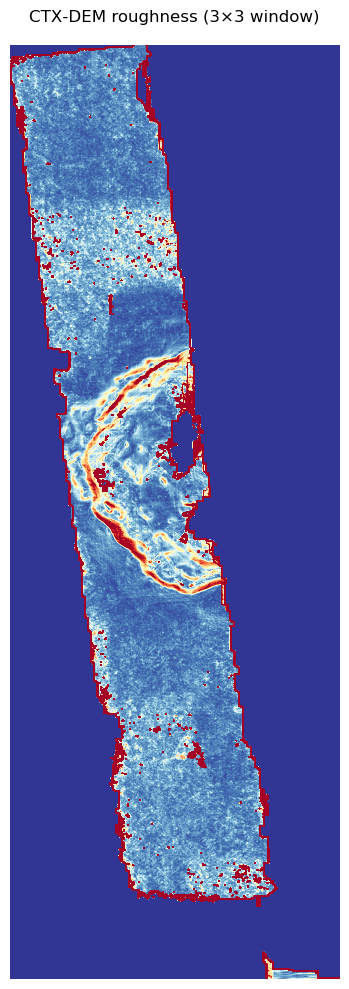

In [79]:
import glob, os
import numpy as np
import rasterio
from rasterio.merge import merge
from scipy import ndimage
import matplotlib.pyplot as plt

# 1) find & open all your 94 CTX DEM tiles
dem_files = glob.glob("data/ctx_tharsis_10km_tiles/*.tif")
srcs = [rasterio.open(fp) for fp in dem_files]

# 2) merge into one big DEM
mosaic, out_trans = merge(srcs)
# mosaic.shape == (1, H, W)
dem = mosaic[0]

# 3) define a roughness filter: difference between local max & min
def local_range(window):
    return np.nanmax(window) - np.nanmin(window)

# choose window size (odd integer). 3→ ~60 m, 5→ ~100 m, etc.
win_size = 3
# pad DEM so edges get handled gracefully
pad_width = win_size // 2
dem_padded = np.pad(dem, pad_width, mode="constant", constant_values=np.nan)

# apply a generic_filter with our local_range
roughness = ndimage.generic_filter(
    dem_padded,
    function=local_range,
    size=win_size,
    mode="constant",
    cval=np.nan
)
# strip off the padding
roughness = roughness[pad_width:-pad_width, pad_width:-pad_width]

# 4) plot the per‐pixel roughness
fig, ax = plt.subplots(1,1,figsize=(6,10))
# calculate extent in the merged DEM’s CRS
left, bottom = out_trans * (0, dem.shape[0])
right, top   = out_trans * (dem.shape[1], 0)
ax.imshow(
    roughness,
    cmap="RdYlBu_r",
    vmin=0, vmax=np.nanpercentile(roughness, 99),  # clip outliers
    extent=(left, right, bottom, top),
    origin="upper"
)
ax.set_title(f"CTX‐DEM roughness ({win_size}×{win_size} window)")
ax.set_axis_off()
plt.tight_layout()
plt.show()


In [81]:
import numpy as np
import pandas as pd
import rasterio
from affine import Affine
from rasterio.merge import merge

# --- 1) load & merge your 94 CTX DEMs as before ---
srcs     = [rasterio.open(fp) for fp in dem_files]
mosaic, out_transform = merge(srcs)
dem      = mosaic[0]            # (H, W) array of elevations
rough    = roughness            # (H, W) array you already computed

# pixel size in meters
px_w = out_transform.a   # pixel width
px_h = -out_transform.e  # pixel height (positive)

# --- 2) helper to get window bounds in array coords ---
def window_for_world(xmin, ymin, xmax, ymax, transform):
    """Given world‐coords box, return row,col window."""
    col0, row0 = ~transform * (xmin, ymax)
    col1, row1 = ~transform * (xmax, ymin)
    # clip and integer‐round
    row0, row1 = map(int, np.clip([row0, row1], 0, dem.shape[0]))
    col0, col1 = map(int, np.clip([col0, col1], 0, dem.shape[1]))
    return row0, row1, col0, col1

# --- 3) define our grid levels (in meters) ---
levels = {
    "A_1km": 1000,
    "B_500m": 500,
    "C_250m": 250,
}

records = []
for name, size_m in levels.items():
    # how many pixels per tile?
    npx = int(size_m / px_w)
    # number of tiles in x/y
    n_rows = int(np.ceil(dem.shape[0] / npx))
    n_cols = int(np.ceil(dem.shape[1] / npx))

    for i in range(n_rows):
        for j in range(n_cols):
            # compute window in array coords
            row0, row1 = i*npx, min((i+1)*npx, dem.shape[0])
            col0, col1 = j*npx, min((j+1)*npx, dem.shape[1])
            sub = rough[row0:row1, col0:col1]
            if np.all(np.isnan(sub)):
                continue

            # world coords of this cell
            xmin, ymax = out_transform * (col0, row0)
            xmax, ymin = out_transform * (col1, row1)
            
            records.append({
                "level":        name,
                "row":          i,
                "col":          j,
                "xmin":         xmin,
                "ymin":         ymin,
                "xmax":         xmax,
                "ymax":         ymax,
                "mean_rough":   float(np.nanmean(sub)),
                "med_rough":    float(np.nanmedian(sub)),
                "max_rough":    float(np.nanmax(sub)),
            })

# --- 4) build DataFrame & inspect ---
df = pd.DataFrame.from_records(records)
print(df.groupby("level")[["mean_rough","med_rough","max_rough"]].agg(["mean","median","max"]))

# 5) save to CSV for downstream ML or manual QC
df.to_csv("multilevel_roughness.csv", index=False)


        mean_rough                       med_rough                       \
              mean median           max       mean median           max   
level                                                                     
A_1km   179.153545    0.0  11349.829102   2.215286    0.0     83.072754   
B_500m  179.667266    0.0  15957.451172   3.500563    0.0  31146.253906   
C_250m  179.015402    0.0  25911.382812  25.630065    0.0  38834.742188   

          max_rough                       
               mean median           max  
level                                     
A_1km   3516.316126    0.0  38969.554688  
B_500m  1861.705884    0.0  38969.554688  
C_250m   953.370718    0.0  38969.554688  


In [83]:
import numpy as np
import pandas as pd
import rasterio
from rasterio.merge import merge

# --- load & merge your CTX DEMs (as before) ---
srcs     = [rasterio.open(fp) for fp in dem_files]
mosaic, out_transform = merge(srcs)
dem      = mosaic[0]
# assume you’ve already computed per‐pixel roughness array “rough”

# pixel spacing (should be ≈20 m)
analysis_res_m = out_transform.a

# grid levels
levels = {
    "A_1km": 1000,
    "B_500m": 500,
    "C_250m": 250,
}

records = []
for level_name, size_m in levels.items():
    npx   = int(size_m / analysis_res_m)
    n_rows = int(np.ceil(dem.shape[0] / npx))
    n_cols = int(np.ceil(dem.shape[1] / npx))

    for i in range(n_rows):
        for j in range(n_cols):
            row0, row1 = i*npx, min((i+1)*npx, dem.shape[0])
            col0, col1 = j*npx, min((j+1)*npx, dem.shape[1])
            sub = rough[row0:row1, col0:col1]
            if np.all(np.isnan(sub)): 
                continue

            # world coordinates
            xmin, ymax = out_transform * (col0, row0)
            xmax, ymin = out_transform * (col1, row1)

            records.append({
                "image_id":          "tharsis_ctx_mosaic",        # or whatever your source ID is
                "level":             level_name,
                "patch_id":          f"{level_name}_r{i}_c{j}",
                "analysis_res_m":    analysis_res_m,
                "xmin":              xmin,
                "ymin":              ymin,
                "xmax":              xmax,
                "ymax":              ymax,
                "mean_rough":        float(np.nanmean(sub)),
                "med_rough":         float(np.nanmedian(sub)),
                "max_rough":         float(np.nanmax(sub)),
            })

df = pd.DataFrame.from_records(records)

# quick sanity‐check
print(df.head())
print(df.groupby("level")["mean_rough"].describe())

# export
df.to_csv("multilevel_roughness_with_ids.csv", index=False)


             image_id  level     patch_id  analysis_res_m       xmin  \
0  tharsis_ctx_mosaic  A_1km  A_1km_r0_c0            20.0 -7162730.0   
1  tharsis_ctx_mosaic  A_1km  A_1km_r0_c1            20.0 -7161730.0   
2  tharsis_ctx_mosaic  A_1km  A_1km_r0_c2            20.0 -7160730.0   
3  tharsis_ctx_mosaic  A_1km  A_1km_r0_c3            20.0 -7159730.0   
4  tharsis_ctx_mosaic  A_1km  A_1km_r0_c4            20.0 -7158730.0   

        ymin       xmax       ymax  mean_rough  med_rough  max_rough  
0 -1766590.0 -7161730.0 -1765590.0         0.0        0.0        0.0  
1 -1766590.0 -7160730.0 -1765590.0         0.0        0.0        0.0  
2 -1766590.0 -7159730.0 -1765590.0         0.0        0.0        0.0  
3 -1766590.0 -7158730.0 -1765590.0         0.0        0.0        0.0  
4 -1766590.0 -7157730.0 -1765590.0         0.0        0.0        0.0  
           count        mean          std  min  25%  50%       75%  \
level                                                                
A

In [85]:
from pystac_client import Client
from planetary_computer import sign
import rasterio
import numpy as np
import pandas as pd
from rasterio.windows import Window
from rasterio.merge import merge

# ── 1) pick your tile geometry (here: the one with highest roughness) ─────────
import geopandas as gpd
tiles = gpd.read_file("tharsis_tiles_basic_class.geojson")
choice = tiles.sort_values("roughness_m", ascending=False).iloc[0]
tile_id, tile_geom = choice.item_id, choice.geometry

# ── 2) search USGS STAC for HiRISE DTM over that footprint ────────────────────
usgs = Client.open("https://stac.astrogeology.usgs.gov/api/")
hirise_items = list(usgs.search(
    collections=["mro_hirise_socet_dtms"],
    intersects=tile_geom,
).get_items())

print("Found", len(hirise_items), "HiRISE DTMs; taking the first…")
item = hirise_items[0]

# ── 3) sign & download the PDS IMG asset and open it ──────────────────────────
dtm_href = sign(item.assets["dtm"].href)   # check item.assets keys if not “dtm”
with rasterio.open(dtm_href) as src:
    dem = src.read(1, masked=True)
    transform = src.transform
    res = src.res[0]                       # should be ~1.0 (m/px)

# ── 4) break that DEM into 2 m×2 m patches and compute roughness ─────────────
patch_size_m = 2.0
npx = int(patch_size_m / res)             # ≈2 pixels → if res=1 m
n_rows = int(np.ceil(dem.shape[0] / npx))
n_cols = int(np.ceil(dem.shape[1] / npx))

records = []
for i in range(n_rows):
    for j in range(n_cols):
        win = Window(j*npx, i*npx,
                     min(npx, dem.shape[1]-j*npx),
                     min(npx, dem.shape[0]-i*npx))
        sub = src.read(1, window=win, masked=True).astype(float)
        if sub.mask.all():
            continue
        
        # world‐coords of this patch
        xmin, ymax = src.window_transform(win) * (0, 0)
        xmax, ymin = src.window_transform(win) * (win.width, win.height)
        
        elev = sub.filled(np.nan)
        r_min, r_max = np.nanmin(elev), np.nanmax(elev)
        records.append({
            "image_id":       tile_id,
            "patch_id":       f"{tile_id}_r{i}_c{j}",
            "analysis_res_m": res,
            "level_m":        patch_size_m,
            "xmin":           xmin,
            "ymin":           ymin,
            "xmax":           xmax,
            "ymax":           ymax,
            "mean_rough":     float(np.nanmean(elev)),
            "med_rough":      float(np.nanmedian(elev)),
            "max_rough":      float(r_max - r_min),
        })

df_2m = pd.DataFrame(records)
df_2m.to_csv("hirise_2m_patches_roughness.csv", index=False)

print("2 m patches:", len(df_2m))
print(df_2m.head())


C:\Users\Dell\anaconda3\Lib\site-packages\pystac_client\item_search.py:881: FutureWarning: get_items() is deprecated, use items() instead
  warnings.warn(


Found 550 HiRISE DTMs; taking the first…


ZeroDivisionError: division by zero

In [87]:
from pystac_client import Client
from planetary_computer import sign
import rasterio
import numpy as np
import pandas as pd
from rasterio.windows import Window
import geopandas as gpd

# 1) select your tile
tiles = gpd.read_file("tharsis_tiles_basic_class.geojson")
choice = tiles.sort_values("roughness_m", ascending=False).iloc[0]
tile_id, tile_geom = choice.item_id, choice.geometry

# 2) grab HiRISE DTMs over that footprint
usgs = Client.open("https://stac.astrogeology.usgs.gov/api/")
items = list(usgs.search(
    collections=["mro_hirise_socet_dtms"],
    intersects=tile_geom,
).get_items())

print(f"Found {len(items)} HiRISE DTMs; inspecting the first one…")
item = items[0]

# 3) dump its asset keys so you can choose the elevation raster
print("Available assets:", item.assets.keys())

# 4) pick the “dem” asset (or “geoid_adjusted_dem” if you prefer)
dem_href = sign(item.assets["dem"].href)
with rasterio.open(dem_href) as src:
    dem       = src.read(1, masked=True)
    T         = src.transform
    # pixel size in meters (for most HiRISE DTMs this will be ~1.0)
    px = abs(T.a)
    py = abs(T.e)
    if px != py:
        print("Warning: non-square pixels", px, py)
    res = px

print("Using elevation asset at", res, "m/pixel resolution.")

# 5) now tile into 2 m patches safely
patch_m = 2.0
npx     = max(1, int(round(patch_m / res)))
n_rows  = int(np.ceil(dem.shape[0] / npx))
n_cols  = int(np.ceil(dem.shape[1] / npx))

records = []
for i in range(n_rows):
    for j in range(n_cols):
        win = Window(j*npx, i*npx,
                     min(npx, dem.shape[1] - j*npx),
                     min(npx, dem.shape[0] - i*npx))
        sub = src.read(1, window=win, masked=True).astype(float)
        if sub.mask.all():
            continue

        # compute roughness
        elev = sub.filled(np.nan)
        rough = float(np.nanmax(elev) - np.nanmin(elev))

        # world bounds for this patch
        tx, ty = src.window_transform(win)
        xmin, ymax = tx * (0, 0)
        xmax, ymin = tx * (win.width, win.height)

        records.append({
            "image_id":     tile_id,
            "patch_id":     f"{tile_id}_r{i}_c{j}",
            "level_m":      patch_m,
            "xmin":         xmin,
            "ymin":         ymin,
            "xmax":         xmax,
            "ymax":         ymax,
            "roughness_m":  rough
        })

df = pd.DataFrame(records)
df.to_csv("hirise_2m_patches_roughness.csv", index=False)
print("Wrote", len(df), "patches at 2 m resolution.")


C:\Users\Dell\anaconda3\Lib\site-packages\pystac_client\item_search.py:881: FutureWarning: get_items() is deprecated, use items() instead
  warnings.warn(


Found 550 HiRISE DTMs; inspecting the first one…
Available assets: dict_keys(['thumbnail', 'dtm', 'hillshade', 'provenance', 'ortho_0', 'ortho_thumbnail_0', 'ortho_label_0', 'ortho_1', 'ortho_thumbnail_1', 'ortho_label_1', 'ortho_2', 'ortho_thumbnail_2', 'ortho_label_2', 'ortho_3', 'ortho_thumbnail_3', 'ortho_label_3', 'ortho_4', 'ortho_thumbnail_4', 'ortho_label_4', 'ortho_5', 'ortho_thumbnail_5', 'ortho_label_5', 'ortho_6', 'ortho_thumbnail_6', 'ortho_label_6', 'ortho_7', 'ortho_thumbnail_7', 'ortho_label_7', 'fom', 'fom_thumbnail'])


KeyError: 'dem'

In [89]:
from pystac_client import Client
from planetary_computer import sign
import rasterio
import numpy as np
import pandas as pd
from rasterio.windows import Window
import geopandas as gpd

# ─── pick your tile (highest-roughness) from the GeoJSON you already saved ───
tiles = gpd.read_file("tharsis_tiles_basic_class.geojson")
choice = tiles.sort_values("roughness_m", ascending=False).iloc[0]
tile_id, tile_geom = choice.item_id, choice.geometry

# ─── grab HiRISE DTMs over that footprint ───
usgs = Client.open("https://stac.astrogeology.usgs.gov/api/")
items = list(usgs.search(
    collections=["mro_hirise_socet_dtms"],
    intersects=tile_geom
).get_items())

print(f"Found {len(items)} HiRISE DTMs; inspecting the first one…")
item = items[0]

# ─── show keys so you can see “dtm” is present ───
print("Available assets:", item.assets.keys())

# ─── open the “dtm” asset ───
dtm_href = sign(item.assets["dtm"].href)
with rasterio.open(dtm_href) as src:
    dem   = src.read(1, masked=True).astype(float)
    T     = src.transform
    # pixel size in map units (should be meters for HiRISE)
    px = abs(T.a)
    py = abs(T.e)
    if not np.isclose(px, py):
        print("⚠️ Warning: non-square pixels", px, py)
    res = px

print(f"Using HiRISE DTM at ~{res:.3f} m/pixel resolution.")

# ─── tile into ~2 m patches ───
patch_m = 2.0
npx     = max(1, int(round(patch_m / res)))
n_rows  = int(np.ceil(dem.shape[0] / npx))
n_cols  = int(np.ceil(dem.shape[1] / npx))

records = []
for i in range(n_rows):
    for j in range(n_cols):
        win = Window(
            j*npx, i*npx,
            min(npx, dem.shape[1] - j*npx),
            min(npx, dem.shape[0] - i*npx),
        )
        sub = src.read(1, window=win, masked=True).astype(float)
        if sub.mask.all():
            continue

        elev = sub.filled(np.nan)
        rough = float(np.nanmax(elev) - np.nanmin(elev))

        # compute world‐coordinates bounds for this window
        tx, ty = src.window_transform(win).to_gdal()
        xmin, ymax = tx*(win.col_off, win.row_off)
        xmax, ymin = tx*(win.col_off + win.width, win.row_off + win.height)

        records.append({
            "image_id":    tile_id,
            "patch_id":    f"{tile_id}_r{i}_c{j}",
            "level_m":     patch_m,
            "xmin":        xmin,
            "ymin":        ymin,
            "xmax":        xmax,
            "ymax":        ymax,
            "roughness_m": rough
        })

df = pd.DataFrame(records)
df.to_csv("hirise_2m_patches_roughness.csv", index=False)
print("Wrote", len(df), "patches at 2 m resolution.")


C:\Users\Dell\anaconda3\Lib\site-packages\pystac_client\item_search.py:881: FutureWarning: get_items() is deprecated, use items() instead
  warnings.warn(


Found 550 HiRISE DTMs; inspecting the first one…
Available assets: dict_keys(['thumbnail', 'dtm', 'hillshade', 'provenance', 'ortho_0', 'ortho_thumbnail_0', 'ortho_label_0', 'ortho_1', 'ortho_thumbnail_1', 'ortho_label_1', 'ortho_2', 'ortho_thumbnail_2', 'ortho_label_2', 'ortho_3', 'ortho_thumbnail_3', 'ortho_label_3', 'ortho_4', 'ortho_thumbnail_4', 'ortho_label_4', 'ortho_5', 'ortho_thumbnail_5', 'ortho_label_5', 'ortho_6', 'ortho_thumbnail_6', 'ortho_label_6', 'ortho_7', 'ortho_thumbnail_7', 'ortho_label_7', 'fom', 'fom_thumbnail'])
Using HiRISE DTM at ~2.024 m/pixel resolution.


RasterioIOError: Dataset is closed: https://astrogeo-ard.s3-us-west-2.amazonaws.com/mars/mro/hirise/controlled/dtm/ESP_075791_1870_ESP_075435_1870/DTEED_075791_1870_075435_1870_A01.tif

In [ ]:
from pystac_client import Client
from planetary_computer import sign
import rasterio
import numpy as np
import pandas as pd
from rasterio.windows import Window

# … (earlier code to pick tile and fetch item remains the same) …

dtm_href = sign(item.assets["dtm"].href)

records = []
with rasterio.open(dtm_href) as src:
    dem   = src.read(1, masked=True).astype(float)
    T     = src.transform
    res   = abs(T.a)
    patch_m = 2.0
    npx     = max(1, int(round(patch_m / res)))
    n_rows  = int(np.ceil(dem.shape[0] / npx))
    n_cols  = int(np.ceil(dem.shape[1] / npx))

    for i in range(n_rows):
        for j in range(n_cols):
            win = Window(
                j*npx, i*npx,
                min(npx, dem.shape[1] - j*npx),
                min(npx, dem.shape[0] - i*npx),
            )
            sub = src.read(1, window=win, masked=True).astype(float)
            if sub.mask.all():
                continue

            elev = sub.filled(np.nan)
            rough = float(np.nanmax(elev) - np.nanmin(elev))

            # world‐coords from the window transform
            wT = src.window_transform(win)
            xmin, ymax = wT * (win.col_off, win.row_off)
            xmax, ymin = wT * (win.col_off + win.width, win.row_off + win.height)

            records.append({
                "image_id":    tile_id,
                "patch_id":    f"{tile_id}_r{i}_c{j}",
                "level_m":     patch_m,
                "xmin":        xmin,
                "ymin":        ymin,
                "xmax":        xmax,
                "ymax":        ymax,
                "roughness_m": rough
            })

# save out
df = pd.DataFrame(records)
df.to_csv("hirise_2m_patches_roughness.csv", index=False)
print("Wrote", len(df), "patches at 2 m resolution.")
